In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats
import squarify
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from scipy import stats
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict
from matplotlib.sankey import Sankey

DATA IMPORT AND EXPLORATION

The dataset of loan.csv, payment.csv, and clarity_underwriting_variables.csv have been imported.
The first few entries in the dataset will be displayed through head().

In [2]:
loan_df = pd.read_csv('data/loan.csv')
print(loan_df.head())

          loanId                          anon_ssn payFrequency    apr  \
0  LL-I-07399092  beff4989be82aab4a5b47679216942fd            B  360.0   
1  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
2  LL-I-10707532  3c174ae9e2505a5f9ddbff9843281845            B  590.0   
3  LL-I-02272596  9be6f443bb97db7e95fa0c281d34da91            B  360.0   
4  LL-I-09542882  63b5494f60b5c19c827c7b068443752c            B  590.0   

              applicationDate  originated              originatedDate  \
0  2016-02-23T17:29:01.940000       False                         NaN   
1  2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
2  2016-08-01T13:51:14.709000       False                         NaN   
3  2015-08-06T23:58:08.880000       False                         NaN   
4  2016-06-05T22:31:34.304000       False                         NaN   

   nPaidOff  approved  isFunded             loanStatus  loanAmount  \
0       0.0     False         0  Withdrawn App

In [3]:
payment_df = pd.read_csv('data/payment.csv')
print(payment_df.head())

          loanId  installmentIndex  isCollection          paymentDate  \
0  LL-I-00000021                 1         False  2014-12-19T05:00:00   
1  LL-I-00000021                 2         False  2015-01-02T05:00:00   
2  LL-I-00000021                 3         False  2015-01-16T05:00:00   
3  LL-I-00000021                 4         False  2015-01-30T05:00:00   
4  LL-I-00000021                 5         False  2015-02-13T05:00:00   

   principal    fees  paymentAmount paymentStatus paymentReturnCode  
0      22.33  147.28         169.61       Checked               NaN  
1      26.44  143.17         169.61       Checked               NaN  
2      31.30  138.31         169.61       Checked               NaN  
3      37.07  132.54         169.61       Checked               NaN  
4      43.89  125.72         169.61       Checked               NaN  


In [4]:
clarity_underwriting_df = pd.read_csv("data/clarity_underwriting_variables.csv", low_memory=False)
print(clarity_underwriting_df.head())

   .underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago  \
0                                                8.0                     
1                                                5.0                     
2                                                9.0                     
3                                                3.0                     
4                                                5.0                     

   .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago  \
0                                                2.0                          
1                                                2.0                          
2                                                4.0                          
3                                                2.0                          
4                                                5.0                          

   .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago  \
0      

The info() methods display summary of these DataFrame.

In [5]:
print("loan.csv Basic DataFrame Information\n")
loan_info = loan_df.info()

print("\npayment.csv Basic DataFrame Information\n")
payment_info = payment_df.info()

print("\nclarity_underwriting_variables.csv Basic DataFrame Information\n")
clarity_underwriting_info = clarity_underwriting_df.info()

loan.csv Basic DataFrame Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            577426 non-null  object 
 1   anon_ssn                          577682 non-null  object 
 2   payFrequency                      576409 non-null  object 
 3   apr                               573760 non-null  float64
 4   applicationDate                   577682 non-null  object 
 5   originated                        577682 non-null  bool   
 6   originatedDate                    46044 non-null   object 
 7   nPaidOff                          577658 non-null  float64
 8   approved                          577682 non-null  bool   
 9   isFunded                          577682 non-null  int64  
 10  loanStatus                        577291 non-null  object 
 11  loanAmount    

The describe() method provides a summary of the statistics pertaining to these DataFrame columns. 

In [6]:
loan_summary = loan_df.describe()
print(loan_summary)

                 apr       nPaidOff       isFunded     loanAmount  \
count  573760.000000  577658.000000  577682.000000  575432.000000   
mean      553.080972       0.037887       0.067480     514.245084   
std       110.046159       0.333366       0.250852     320.939929   
min         0.000000       0.000000       0.000000       0.000000   
25%       490.000000       0.000000       0.000000     350.000000   
50%       590.000000       0.000000       0.000000     500.000000   
75%       601.000000       0.000000       0.000000     500.000000   
max       705.590000      21.000000       1.000000    5000.000000   

       originallyScheduledPaymentAmount       leadCost          hasCF  
count                     577682.000000  577682.000000  577682.000000  
mean                        1428.897209       7.854389       0.619187  
std                          925.009141      12.853451       0.485587  
min                         -816.710000       0.000000       0.000000  
25%               

In [7]:
payment_summary = payment_df.describe()
print(payment_summary)

       installmentIndex      principal           fees  paymentAmount
count     689364.000000  689364.000000  689364.000000  689364.000000
mean          10.553222      45.557543      67.003994     112.680232
std            8.049530      81.724683      59.789510     105.783710
min            1.000000    -303.370000     -42.560000    -337.700000
25%            5.000000      13.180000      28.820000      56.810000
50%            9.000000      27.610000      51.300000      86.340000
75%           14.000000      53.380000      86.440000     135.090000
max          105.000000    4000.000000    1257.710000    4063.600000


In [8]:
clarity_underwriting_summary = clarity_underwriting_df.describe()
print(clarity_underwriting_summary)

       .underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago  \
count                                       49750.000000                     
mean                                            7.313628                     
std                                             6.327122                     
min                                             0.000000                     
25%                                             3.000000                     
50%                                             5.000000                     
75%                                             9.000000                     
max                                            89.000000                     

       .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago  \
count                                       49750.000000                          
mean                                            4.601990                          
std                                             

Group data based on a categorical variable and count how many time each unique value appears in these datasets.

In [9]:
group_by_loanStatus = loan_df.groupby('loanStatus').size()
print(group_by_loanStatus)

loanStatus
CSR Voided New Loan              1026
Charged Off                         1
Charged Off Paid Off              160
Credit Return Void                704
Customer Voided New Loan          504
Customver Voided New Loan           1
External Collection             11334
Internal Collection              5567
New Loan                         8112
Paid Off Loan                   11427
Pending Application                 4
Pending Application Fee             5
Pending Paid Off                  169
Pending Rescind                     4
Rejected                        85070
Returned Item                    1182
Settled Bankruptcy                326
Settlement Paid Off               708
Settlement Pending Paid Off         1
Voided New Loan                     2
Withdrawn Application          450984
dtype: int64


In [10]:
group_by_leadType = loan_df.groupby('leadType').size()
print(group_by_leadType)

leadType
bvMandatory      475001
california          479
express              22
instant-offer        22
lead              72673
lionpay              26
organic           22851
prescreen          4515
rc_returning       2069
repeat               24
dtype: int64


In [11]:
group_by_payFrequency = loan_df.groupby('payFrequency').size()
print(group_by_payFrequency)

payFrequency
B    316654
I     33787
M     59092
S     29688
W    137188
dtype: int64


In [12]:
group_by_paymentReturnCode = payment_df.groupby('paymentStatus').size()
print(group_by_paymentReturnCode)

paymentStatus
Cancelled                  270334
Checked                    209621
Complete                        1
Pending                      9241
Rejected                    32330
Rejected Awaiting Retry        18
Returned                        1
Skipped                      3761
dtype: int64


In [13]:
group_by_overallmatchresult = clarity_underwriting_df.groupby('.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult').size()
print(group_by_overallmatchresult)


.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult
match       14273
mismatch       97
other         263
partial     35087
dtype: int64


Data Manipulation and Transformation (loan.csv)

Save original data before conducting data transformation

In [14]:
ori_loan_df = loan_df

Perform data clearning by handling missing value (null value)

In [15]:
def check_null(df):
    return df.isnull().sum()

loan_df_null_counts = check_null(loan_df)
print(loan_df_null_counts)

loanId                                 256
anon_ssn                                 0
payFrequency                          1273
apr                                   3922
applicationDate                          0
originated                               0
originatedDate                      531638
nPaidOff                                24
approved                                 0
isFunded                                 0
loanStatus                             391
loanAmount                            2250
originallyScheduledPaymentAmount         0
state                                  132
leadType                                 0
leadCost                                 0
fpStatus                            525959
clarityFraudId                      219989
hasCF                                    0
dtype: int64


loadId is a unique loan identifier, hence cannot be null.

In [16]:
loan_df = loan_df.dropna(subset=['loanId'])

loadId is a unique loan identifier, hence cannot be duplicated

In [17]:
duplicates_loanid = loan_df.duplicated(subset=['loanId'])
print(loan_df[duplicates_loanid])


Empty DataFrame
Columns: [loanId, anon_ssn, payFrequency, apr, applicationDate, originated, originatedDate, nPaidOff, approved, isFunded, loanStatus, loanAmount, originallyScheduledPaymentAmount, state, leadType, leadCost, fpStatus, clarityFraudId, hasCF]
Index: []


anon_ssn can be duplicated to compare if	a	
loan	belongs	to	a	previous	customer.

In [18]:
duplicates_anon_ssn = loan_df.duplicated(subset=['anon_ssn'])
print(loan_df[duplicates_anon_ssn])

               loanId                          anon_ssn payFrequency     apr  \
1364    LL-I-05594237  6f9a0e7f81d5665b2930fa4083075ca1            W  590.00   
2580    LL-I-01130261  b45006611c24c836097d8dff85e217eb            B  390.00   
3056    LL-I-18381872  6a482fa17ef20efb2b078d5a9476115f            B  600.00   
3366    LL-I-00708536  d41e4188ed0c52c8708cd39eb7c0ab9b            B  449.99   
3395    LL-I-09048752  ac35345e62f1092eef1068776eb11e29            B  490.00   
...               ...                               ...          ...     ...   
577666  LL-I-11809630  ad6970cdb83f6f5fc0154ac8e2d6746a            W  590.00   
577675  LL-I-17012301  43ff47d188fa9350e43f18094254b4d1            W  590.00   
577676  LL-I-07825899  3506893b63baae416cf211238a391acc            B  590.00   
577680  LL-I-01253468  c3b35307cb36116bf59574f9138d3dad            B  550.00   
577681  LL-I-04733921  dc0a43b16c037ee5d0142daebb5db83a            I  590.00   

                   applicationDate  ori

If the loan has been originated, the originatedDate cannot be null.

In [19]:
invalid_origination = loan_df[(loan_df['originated'] == True) & (loan_df['originatedDate'].isnull())]
print(invalid_origination)

Empty DataFrame
Columns: [loanId, anon_ssn, payFrequency, apr, applicationDate, originated, originatedDate, nPaidOff, approved, isFunded, loanStatus, loanAmount, originallyScheduledPaymentAmount, state, leadType, leadCost, fpStatus, clarityFraudId, hasCF]
Index: []


If the loan has been originated, the apr cannot be null.

In [20]:
invalid_APR = loan_df[(loan_df['originated'] == True) & (loan_df['apr'].isnull())]
print(invalid_APR)

Empty DataFrame
Columns: [loanId, anon_ssn, payFrequency, apr, applicationDate, originated, originatedDate, nPaidOff, approved, isFunded, loanStatus, loanAmount, originallyScheduledPaymentAmount, state, leadType, leadCost, fpStatus, clarityFraudId, hasCF]
Index: []


If the loan has not been originated, there are some apr is set to 0. Thus, set the rest of null APR to 0 if the loan has not been originated.
Check again if there is any null APR.

In [21]:
loan_df.loc[(loan_df['apr'].isnull()) & (loan_df['originated'] == False), 'apr'] = 0
invalid_APR = loan_df[(loan_df['originated'] == False) & (loan_df['apr'].isnull())]
print(invalid_APR)

Empty DataFrame
Columns: [loanId, anon_ssn, payFrequency, apr, applicationDate, originated, originatedDate, nPaidOff, approved, isFunded, loanStatus, loanAmount, originallyScheduledPaymentAmount, state, leadType, leadCost, fpStatus, clarityFraudId, hasCF]
Index: []


If the loan has been originated, the loan status cannot be null

In [22]:
invalid_loanStatus = loan_df[(loan_df['originated'] == True) & (loan_df['loanStatus'].isnull())]
print(invalid_loanStatus)

Empty DataFrame
Columns: [loanId, anon_ssn, payFrequency, apr, applicationDate, originated, originatedDate, nPaidOff, approved, isFunded, loanStatus, loanAmount, originallyScheduledPaymentAmount, state, leadType, leadCost, fpStatus, clarityFraudId, hasCF]
Index: []


If the loan has been originated, the loan amount cannot be null

In [23]:
invalid_loanAmount = loan_df[(loan_df['originated'] == True) & (loan_df['loanAmount'].isnull())]
print(invalid_loanAmount)

Empty DataFrame
Columns: [loanId, anon_ssn, payFrequency, apr, applicationDate, originated, originatedDate, nPaidOff, approved, isFunded, loanStatus, loanAmount, originallyScheduledPaymentAmount, state, leadType, leadCost, fpStatus, clarityFraudId, hasCF]
Index: []


Check if there is any null nPaidff associataed with not originated loan.

In [24]:
invalid_nPaidOff = loan_df[(loan_df['originated'] == False) & (loan_df['nPaidOff'].isna())]
print(invalid_nPaidOff)

               loanId                          anon_ssn payFrequency     apr  \
227052  LP-I-00000071  6d6ce424f91a58d04cf550f48781b747            B  29.990   
228429  LP-I-00000059  6349ff7c27eb1a466b474b46307627c3            W  29.990   
480873  LP-I-00000029  47a1c5731f7a3db7a4540558c582f49c            I  29.999   

                   applicationDate  originated originatedDate  nPaidOff  \
227052  2015-11-08T19:40:15.603000       False            NaN       NaN   
228429  2015-11-02T02:28:45.385000       False            NaN       NaN   
480873  2015-10-04T14:09:55.821000       False            NaN       NaN   

        approved  isFunded             loanStatus  loanAmount  \
227052     False         0  Withdrawn Application      1450.0   
228429     False         0  Withdrawn Application       555.0   
480873     False         0    CSR Voided New Loan       934.0   

        originallyScheduledPaymentAmount state leadType  leadCost fpStatus  \
227052                           1565.6

If the loan has not been originated, set nPaidOff (how many MoneyLion loands this client has paid off in the past) to 0

In [25]:
invalid_nPaidOff = loan_df[(loan_df['originated'] == False) & (loan_df['nPaidOff'].isnull())]
loan_df.loc[invalid_nPaidOff.index, 'nPaidOff'] = 0

If the loan has been originated, the nPaidOff cannot be null

In [26]:
invalid_nPaidOff = loan_df[(loan_df['originated'] == True) & (loan_df['nPaidOff'].isna())]
print(invalid_nPaidOff)

               loanId                          anon_ssn payFrequency     apr  \
22980   LL-I-00002148  2b2951c8841c4737159133b21256e398            B  442.89   
53102   LL-I-00000614  cf816b8a04a00ad2d99388b639b5d811            B  478.67   
87575   LL-I-00002583  f3bcd005f003948c8d731e2d05989063            M  478.67   
109393  LL-I-00002917  b9489fbc49f70a69ed5af6b43883a017            B  478.67   
116604  LL-I-00000238  9e70eecb9c114068d5ef4431a40f7d66            B  478.67   
149793  LP-I-00000073  e14f968c746e67840a0bd72dea788dfa            B   29.99   
151364  LL-I-00000308  6860de82ee70ce65b8df8f3cee51dff5            S  705.59   
165023  LL-I-00003378  dbaf310d394f0dd34f506da08fe16999            B  442.89   
169457  LL-I-00000021  3e02899b53aa4877f9823b8ed5d5a6f1            B  478.67   
180566  LL-I-00003838  ffcc526294336c3d952af6de5f82793e            B  478.67   
185794  LL-I-00003372  9061f0918a96cdc125322568161aaf1f            B  478.67   
202315  LL-I-00001902  30f62193505657d44

If the loan has been originated, set nPaidOff (how many MoneyLion loands this client has paid off in the past) to 0 if the value in dataset is null initially.

In [27]:
invalid_nPaidOff = loan_df[(loan_df['originated'] == True) & (loan_df['nPaidOff'].isnull())]
loan_df.loc[invalid_nPaidOff.index, 'nPaidOff'] = 0


If the loan has been originated, the fpStatus cannot be null

In [28]:
invalid_fpStatus = loan_df[(loan_df['fpStatus'] == True) & (loan_df['nPaidOff'].isnull())]
print(invalid_fpStatus)

Empty DataFrame
Columns: [loanId, anon_ssn, payFrequency, apr, applicationDate, originated, originatedDate, nPaidOff, approved, isFunded, loanStatus, loanAmount, originallyScheduledPaymentAmount, state, leadType, leadCost, fpStatus, clarityFraudId, hasCF]
Index: []


If the loan has clarity fraud, the clarityFraudId cannot be null.

In [29]:
invalid_fpStatus = loan_df[(loan_df['hasCF'] == 1) & (loan_df['clarityFraudId'].isnull())]
print(invalid_fpStatus)

Empty DataFrame
Columns: [loanId, anon_ssn, payFrequency, apr, applicationDate, originated, originatedDate, nPaidOff, approved, isFunded, loanStatus, loanAmount, originallyScheduledPaymentAmount, state, leadType, leadCost, fpStatus, clarityFraudId, hasCF]
Index: []


Handle ambigious value which is OH-TEST and TX-TEST

In [30]:
loan_df.loc[loan_df['state'] == 'OH-TEST', 'state'] = 'OH'
loan_df.loc[loan_df['state'] == 'TX-TEST', 'state'] = 'TX'

Check if the input is a string and if it is missing microseconds in date.

In [31]:
loan_df = loan_df.copy()
payment_df = payment_df.copy()

def append_microseconds(dt):
    if isinstance(dt, str) and 'T' in dt and '.' not in dt:
        return dt + '.000000'
    return dt

loan_df['applicationDate'] = loan_df['applicationDate'].apply(append_microseconds)
loan_df['originatedDate'] = loan_df['originatedDate'].apply(append_microseconds)
payment_df['paymentDate'] = payment_df['paymentDate'].apply(append_microseconds)

Add applicationYear and applicationMonth columns derived from applicationDate.

In [32]:
loan_df = loan_df.copy()
loan_df['applicationDate'] = pd.to_datetime(loan_df['applicationDate'], errors='coerce')
loan_df['applicationYear'] = loan_df['applicationDate'].dt.year.astype('Int64')
loan_df['applicationMonth'] = loan_df['applicationDate'].dt.month.astype('Int64')
print(loan_df.head())


          loanId                          anon_ssn payFrequency    apr  \
0  LL-I-07399092  beff4989be82aab4a5b47679216942fd            B  360.0   
1  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
2  LL-I-10707532  3c174ae9e2505a5f9ddbff9843281845            B  590.0   
3  LL-I-02272596  9be6f443bb97db7e95fa0c281d34da91            B  360.0   
4  LL-I-09542882  63b5494f60b5c19c827c7b068443752c            B  590.0   

          applicationDate  originated              originatedDate  nPaidOff  \
0 2016-02-23 17:29:01.940       False                         NaN       0.0   
1 2016-01-19 22:07:36.778        True  2016-01-20T15:49:18.846000       0.0   
2 2016-08-01 13:51:14.709       False                         NaN       0.0   
3 2015-08-06 23:58:08.880       False                         NaN       0.0   
4 2016-06-05 22:31:34.304       False                         NaN       0.0   

   approved  isFunded  ... loanAmount  originallyScheduledPaymentAmount  \
0    

Add originatedYear and originatedMonth columns derived from originatedDate.

In [33]:
loan_df = loan_df.copy()
loan_df['originatedDate'] = pd.to_datetime(loan_df['originatedDate'], errors='coerce')
loan_df['originatedYear'] = loan_df['originatedDate'].dt.year.astype('Int64')
loan_df['originatedMonth'] = loan_df['originatedDate'].dt.month.astype('Int64')

Add paymentYear and paymentMonth columns derived from paymentDate.

In [34]:
payment_df = payment_df.copy()
payment_df['paymentDate'] = pd.to_datetime(payment_df['paymentDate'], errors='coerce')
payment_df['paymentYear'] = payment_df['paymentDate'].dt.year.astype('Int64')
payment_df['paymentMonth'] = payment_df['paymentDate'].dt.month.astype('Int64')

Check how many loan has been applied in each year.

In [35]:
group_by_applicationYear = loan_df.groupby('applicationYear').size()
print(group_by_applicationYear)

applicationYear
2014       747
2015    126103
2016    318715
2017    131861
dtype: int64


Check how many loan has been originated in each year.

In [36]:
group_by_originatedYear = loan_df.groupby('originatedYear').size()
print(group_by_originatedYear)

originatedYear
2014      139
2015    10190
2016    22305
2017    13410
dtype: int64


Convert categorical variable into Factor for Level Indication and Check the levels of a factor 

In [37]:
loan_df['payFrequency'] = pd.Categorical(loan_df['payFrequency'], ordered=True)
loan_df['loanStatus'] = pd.Categorical(loan_df['loanStatus'], ordered=True)
loan_df['state'] = pd.Categorical(loan_df['state'], ordered=True)
loan_df['leadType'] = pd.Categorical(loan_df['leadType'], ordered=True)
loan_df['fpStatus'] = pd.Categorical(loan_df['fpStatus'], ordered=True)

print(loan_df['payFrequency'].cat.categories)
print(loan_df['loanStatus'].cat.categories)
print(loan_df['state'].cat.categories)
print(loan_df['leadType'].cat.categories)
print(loan_df['fpStatus'].cat.categories)

Index(['B', 'I', 'M', 'S', 'W'], dtype='object')
Index(['CSR Voided New Loan', 'Charged Off', 'Charged Off Paid Off',
       'Credit Return Void', 'Customer Voided New Loan',
       'Customver Voided New Loan', 'External Collection',
       'Internal Collection', 'New Loan', 'Paid Off Loan',
       'Pending Application', 'Pending Application Fee', 'Pending Paid Off',
       'Pending Rescind', 'Rejected', 'Returned Item', 'Settled Bankruptcy',
       'Settlement Paid Off', 'Settlement Pending Paid Off', 'Voided New Loan',
       'Withdrawn Application'],
      dtype='object')
Index(['AK', 'AL', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID',
       'IL', 'IN', 'KS', 'KY', 'LA', 'MD', 'MI', 'MN', 'MO', 'MS', 'NC', 'ND',
       'NE', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'WA', 'WI', 'WY'],
      dtype='object')
Index(['bvMandatory', 'california', 'express', 'instant-offer', 'lead',
       'lionpay', 'organic', 'prescreen', '

Check if there is any null alue in payment_df dataframe.

Data Manipulation and Transformation (payment.csv)

Save original data before conducting data transformation.

In [38]:
ori_payment_df = payment_df

Check if there is any null values in payment_df.

In [39]:
payment_df_null_counts = check_null(payment_df)
print(payment_df_null_counts)

loanId                    0
installmentIndex          0
isCollection              0
paymentDate               0
principal                 0
fees                      0
paymentAmount             0
paymentStatus        164057
paymentReturnCode    657831
paymentYear               0
paymentMonth              0
dtype: int64


Perform an inner join on the 'loanId' column to merge loan df and payment df.

In [40]:
loan_payment_df = pd.merge(loan_df, payment_df, on='loanId', how='inner')
print(loan_payment_df.head())

          loanId                          anon_ssn payFrequency    apr  \
0  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
1  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
2  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
3  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
4  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   

          applicationDate  originated          originatedDate  nPaidOff  \
0 2016-01-19 22:07:36.778        True 2016-01-20 15:49:18.846       0.0   
1 2016-01-19 22:07:36.778        True 2016-01-20 15:49:18.846       0.0   
2 2016-01-19 22:07:36.778        True 2016-01-20 15:49:18.846       0.0   
3 2016-01-19 22:07:36.778        True 2016-01-20 15:49:18.846       0.0   
4 2016-01-19 22:07:36.778        True 2016-01-20 15:49:18.846       0.0   

   approved  isFunded  ... installmentIndex  isCollection         paymentDate  \
0      True         1  

Find unmatched rows in loan_df.

In [41]:
unmatched_df = pd.merge(loan_df, payment_df, on='loanId', how='left', indicator=True).query('_merge == "left_only"')
print(unmatched_df.head())

           loanId                          anon_ssn payFrequency    apr  \
0   LL-I-07399092  beff4989be82aab4a5b47679216942fd            B  360.0   
26  LL-I-10707532  3c174ae9e2505a5f9ddbff9843281845            B  590.0   
27  LL-I-02272596  9be6f443bb97db7e95fa0c281d34da91            B  360.0   
28  LL-I-09542882  63b5494f60b5c19c827c7b068443752c            B  590.0   
29  LL-I-09734486  b5541f49472fa0fce8e473306768f7fb            M  650.0   

           applicationDate  originated originatedDate  nPaidOff  approved  \
0  2016-02-23 17:29:01.940       False            NaT       0.0     False   
26 2016-08-01 13:51:14.709       False            NaT       0.0     False   
27 2015-08-06 23:58:08.880       False            NaT       0.0     False   
28 2016-06-05 22:31:34.304       False            NaT       0.0     False   
29 2016-06-12 19:27:47.951       False            NaT       0.0     False   

    isFunded  ... isCollection  paymentDate  principal fees paymentAmount  \
0        

Find unmatched rows in payment_df.

In [42]:
unmatched_df = pd.merge(payment_df, loan_df, on='loanId', how='left', indicator=True).query('_merge == "left_only"')
print(unmatched_df.head())

Empty DataFrame
Columns: [loanId, installmentIndex, isCollection, paymentDate, principal, fees, paymentAmount, paymentStatus, paymentReturnCode, paymentYear, paymentMonth, anon_ssn, payFrequency, apr, applicationDate, originated, originatedDate, nPaidOff, approved, isFunded, loanStatus, loanAmount, originallyScheduledPaymentAmount, state, leadType, leadCost, fpStatus, clarityFraudId, hasCF, applicationYear, applicationMonth, originatedYear, originatedMonth, _merge]
Index: []

[0 rows x 34 columns]


Check if there is duplicated payment record at same date and time.

In [43]:
duplicates_payment = payment_df.duplicated()
duplicated_payments_df = payment_df[duplicates_payment]
print(duplicated_payments_df)


Empty DataFrame
Columns: [loanId, installmentIndex, isCollection, paymentDate, principal, fees, paymentAmount, paymentStatus, paymentReturnCode, paymentYear, paymentMonth]
Index: []


In [44]:
payment_df = payment_df.copy()
payment_df['paymentDate'] = pd.to_datetime(payment_df['paymentDate'], errors='coerce')
payment_df['paymentYear'] = payment_df['paymentDate'].dt.year.astype('Int64')
payment_df['paymentMonth'] = payment_df['paymentDate'].dt.month.astype('Int64')
print(payment_df.head())

          loanId  installmentIndex  isCollection         paymentDate  \
0  LL-I-00000021                 1         False 2014-12-19 05:00:00   
1  LL-I-00000021                 2         False 2015-01-02 05:00:00   
2  LL-I-00000021                 3         False 2015-01-16 05:00:00   
3  LL-I-00000021                 4         False 2015-01-30 05:00:00   
4  LL-I-00000021                 5         False 2015-02-13 05:00:00   

   principal    fees  paymentAmount paymentStatus paymentReturnCode  \
0      22.33  147.28         169.61       Checked               NaN   
1      26.44  143.17         169.61       Checked               NaN   
2      31.30  138.31         169.61       Checked               NaN   
3      37.07  132.54         169.61       Checked               NaN   
4      43.89  125.72         169.61       Checked               NaN   

   paymentYear  paymentMonth  
0         2014            12  
1         2015             1  
2         2015             1  
3         2015  

Check how many payment has been made in each year.

In [45]:
group_by_paymentYear = payment_df.groupby('paymentYear').size()
print(group_by_paymentYear)

paymentYear
2014       132
2015     94135
2016    259078
2017    332879
2018      2928
2019       197
2020        13
2021         2
dtype: int64


Convert categorical variable into Factor for Level Indication and Check the levels of a factor.

In [46]:
payment_df['paymentStatus'] = pd.Categorical(payment_df['paymentStatus'], ordered=True)
payment_df['paymentReturnCode'] = pd.Categorical(payment_df['paymentReturnCode'], ordered=True)

print(payment_df['paymentStatus'].cat.categories)
print(payment_df['paymentReturnCode'].cat.categories)


Index(['Cancelled', 'Checked', 'Complete', 'Pending', 'Rejected',
       'Rejected Awaiting Retry', 'Returned', 'Skipped'],
      dtype='object')
Index(['C01', 'C02', 'C03', 'C05', 'C07', 'LPP01', 'MISSED', 'R01', 'R02',
       'R03', 'R04', 'R06', 'R07', 'R08', 'R09', 'R10', 'R13', 'R15', 'R16',
       'R19', 'R20', 'R29', 'R99', 'RAF', 'RBW', 'RFG', 'RIR', 'RUP', 'RWC',
       'RXL', 'RXS'],
      dtype='object')


Data Manipulation and Transformation (clarity_underwriting_variables.csv)

Save the original value of clarity_underwriting_df in ori_clarity_underwriting_df

In [47]:
ori_clarity_underwriting_df = clarity_underwriting_df

Since the variable name is too long, rename the columns by removing the same prefix which is '.underwritingdataclarity.clearfraud.clearfraud'.

In [48]:
prefix_to_remove = '.underwritingdataclarity.clearfraud.clearfraud'

def rename_column(col_name):
    if col_name.startswith(prefix_to_remove):
        col_name = col_name[len(prefix_to_remove):]
    col_name = col_name.replace('.', '_')
    return col_name

clarity_underwriting_columnname = {col: rename_column(col) for col in clarity_underwriting_df.columns}

clarity_underwriting_df.rename(columns=clarity_underwriting_columnname, inplace=True)

print(clarity_underwriting_df.columns)


Index(['inquiry_thirtydaysago', 'inquiry_twentyfourhoursago',
       'inquiry_oneminuteago', 'inquiry_onehourago', 'inquiry_ninetydaysago',
       'inquiry_sevendaysago', 'inquiry_tenminutesago',
       'inquiry_fifteendaysago', 'inquiry_threesixtyfivedaysago',
       'indicator_inquiryonfilecurrentaddressconflict',
       'indicator_totalnumberoffraudindicators',
       'indicator_telephonenumberinconsistentwithaddress',
       'indicator_inquiryageyoungerthanssnissuedate',
       'indicator_onfileaddresscautious',
       'indicator_inquiryaddressnonresidential',
       'indicator_onfileaddresshighrisk',
       'indicator_ssnreportedmorefrequentlyforanother',
       'indicator_currentaddressreportedbytradeopenlt90days',
       'indicator_inputssninvalid',
       'indicator_inputssnissuedatecannotbeverified',
       'indicator_inquiryaddresscautious',
       'indicator_morethan3inquiriesinthelast30days',
       'indicator_onfileaddressnonresidential',
       'indicator_creditestablishe

Rename the inquiry timeframe columns to numbes for better clarification.

In [49]:
clarity_underwriting_df = clarity_underwriting_df.rename(columns={
    'inquiry_thirtydaysago': 'inquiry_30d',
    'inquiry_twentyfourhoursago': 'inquiry_24h',
    'inquiry_oneminuteago': 'inquiry_1m',
    'inquiry_onehourago': 'inquiry_1h',
    'inquiry_ninetydaysago': 'inquiry_90d',
    'inquiry_sevendaysago': 'inquiry_7d',
    'inquiry_tenminutesago':'inquiry_10m',
    'inquiry_fifteendaysago': 'inquiry_15d',
    'inquiry_threesixtyfivedaysago': 'inquiry_365d',
})

Check underwritingid if is a unique loan identifier, hence cannot be duplicated

In [50]:
duplicates_underwritingid = clarity_underwriting_df.duplicated(subset=['underwritingid'])
clarity_underwriting_df[duplicates_underwritingid]

Empty DataFrame
Columns: [inquiry_30d, inquiry_24h, inquiry_1m, inquiry_1h, inquiry_90d, inquiry_7d, inquiry_10m, inquiry_15d, inquiry_365d, indicator_inquiryonfilecurrentaddressconflict, indicator_totalnumberoffraudindicators, indicator_telephonenumberinconsistentwithaddress, indicator_inquiryageyoungerthanssnissuedate, indicator_onfileaddresscautious, indicator_inquiryaddressnonresidential, indicator_onfileaddresshighrisk, indicator_ssnreportedmorefrequentlyforanother, indicator_currentaddressreportedbytradeopenlt90days, indicator_inputssninvalid, indicator_inputssnissuedatecannotbeverified, indicator_inquiryaddresscautious, indicator_morethan3inquiriesinthelast30days, indicator_onfileaddressnonresidential, indicator_creditestablishedpriortossnissuedate, indicator_driverlicenseformatinvalid, indicator_inputssnrecordedasdeceased, indicator_inquiryaddresshighrisk, indicator_inquirycurrentaddressnotonfile, indicator_bestonfilessnissuedatecannotbeverified, indicator_highprobabilityssnbelongstoanother, indicator_maxnumberofssnswithanybankaccount, indicator_bestonfilessnrecordedasdeceased, indicator_currentaddressreportedbynewtradeonly, indicator_creditestablishedbeforeage18, indicator_telephonenumberinconsistentwithstate, indicator_driverlicenseinconsistentwithonfile, indicator_workphonepreviouslylistedascellphone, indicator_workphonepreviouslylistedashomephone, identityverification_ssnnamematch, identityverification_nameaddressmatch, identityverification_phonematchtype, identityverification_ssnnamereasoncodedescription, identityverification_phonematchresult, identityverification_nameaddressreasoncodedescription, identityverification_phonematchtypedescription, identityverification_overallmatchresult, identityverification_phonetype, identityverification_ssndobreasoncode, identityverification_ssnnamereasoncode, identityverification_nameaddressreasoncode, identityverification_ssndobmatch, identityverification_overallmatchreasoncode, clearfraudscore, underwritingid]
Index: []

[0 rows x 54 columns]

Check if there is any null value in clarity_underwriting_df

In [51]:
clarity_underwriting_df_null_counts = check_null(clarity_underwriting_df)
print(clarity_underwriting_df_null_counts)

inquiry_30d                                                  2
inquiry_24h                                                  2
inquiry_1m                                                   2
inquiry_1h                                                   2
inquiry_90d                                                  2
inquiry_7d                                                   2
inquiry_10m                                                  2
inquiry_15d                                                  2
inquiry_365d                                                 2
indicator_inquiryonfilecurrentaddressconflict               40
indicator_totalnumberoffraudindicators                      17
indicator_telephonenumberinconsistentwithaddress            40
indicator_inquiryageyoungerthanssnissuedate                 40
indicator_onfileaddresscautious                             40
indicator_inquiryaddressnonresidential                      40
indicator_onfileaddresshighrisk                        

Display each unique value in inquiry timeframe columns.

In [52]:
timeframe_columns = [col for col in clarity_underwriting_df.columns if col.startswith('inquiry_')]
for col in timeframe_columns:
    unique_values = clarity_underwriting_df[col].unique()
    print(f'Column {col}: {unique_values}')

Column inquiry_30d: [ 8.  5.  9.  3. 11.  6.  7.  2.  4. 25. 20. 16. 30. 17. 23. 13. 21. 10.
 14. 15. 12. 19. 18. 22. 27. 39. 26.  1. 32. 44. 24. 31. 36. 42. 29. 28.
 54. 43. 35. 47. 52. 49. 60. 50. 37. 72. 41. 88. 53. 48. 45. 33. 34. 58.
 40. 46. 55. 76. 65. 38. 62. 57. 69. 89. 51. 73. 61. 74. 77. 86. 56. 59.
 66. 71.  0. 81. 70. 64. nan 78.]
Column inquiry_24h: [ 2.  4.  5.  6.  3.  1.  9. 16.  7. 11. 10.  8. 19. 12. 14. 20. 17. 13.
 25. 33. 15. 23. 21. 18. 43. 22. 24. 31. 27. 57. 32. 60. 42. 41. 28. 26.
 35. 58. 38. 29.  0. 44. 34. 39. 36. 30. 48. nan]
Column inquiry_1m: [ 2.  6.  3.  1.  4.  5.  8.  7. 11.  9. 10.  0. 12. nan 14. 16.]
Column inquiry_1h: [ 2.  3.  6.  1.  4.  5.  7.  8.  9. 10. 15. 14. 20. 12. 13. 21. 16. 11.
 18. 23. 24. 17. 22. 19. 27. 28. 25. 26. 29.  0. 31. 42. 33. 32. 35. nan
 30.]
Column inquiry_90d: [  8.  11.  10.   9.   6.  21.   5.  14.   3.  22.   4.   2.  12.  26.
  15.  28.  16.   7.  32.  33.  13.  17.  23.  49.  30.  43.  18.  29.
  24.  20.  19.  31.

Set inquiry_{timeframe} from NA/NAN to 0.

In [53]:
timeframe_columns = [col for col in clarity_underwriting_df.columns if col.startswith('inquiry_')]
for col in timeframe_columns:
    clarity_underwriting_df[col] = clarity_underwriting_df[col].replace('NA', 0)
    clarity_underwriting_df[col] = clarity_underwriting_df[col].fillna(0)


Check again if there is any null value in timeframe_columns.

In [54]:
clarity_underwriting_df_null_counts = check_null(clarity_underwriting_df)
print(clarity_underwriting_df_null_counts)

inquiry_30d                                                  0
inquiry_24h                                                  0
inquiry_1m                                                   0
inquiry_1h                                                   0
inquiry_90d                                                  0
inquiry_7d                                                   0
inquiry_10m                                                  0
inquiry_15d                                                  0
inquiry_365d                                                 0
indicator_inquiryonfilecurrentaddressconflict               40
indicator_totalnumberoffraudindicators                      17
indicator_telephonenumberinconsistentwithaddress            40
indicator_inquiryageyoungerthanssnissuedate                 40
indicator_onfileaddresscautious                             40
indicator_inquiryaddressnonresidential                      40
indicator_onfileaddresshighrisk                        

Display each unique value in inducator columns.

In [55]:
indicator_columns = [col for col in clarity_underwriting_df.columns if col.startswith('indicator_')]
for col in indicator_columns:
    unique_values = clarity_underwriting_df[col].unique()
    print(f'Column {col}: {unique_values}')

Column indicator_inquiryonfilecurrentaddressconflict: [False True nan]
Column indicator_totalnumberoffraudindicators: [ 2.  3.  1.  0.  4.  6.  5.  7.  8. nan]
Column indicator_telephonenumberinconsistentwithaddress: [True False nan]
Column indicator_inquiryageyoungerthanssnissuedate: [False nan True]
Column indicator_onfileaddresscautious: [False nan True]
Column indicator_inquiryaddressnonresidential: [True False nan]
Column indicator_onfileaddresshighrisk: [False True nan]
Column indicator_ssnreportedmorefrequentlyforanother: [False True nan]
Column indicator_currentaddressreportedbytradeopenlt90days: [False True nan]
Column indicator_inputssninvalid: [False nan]
Column indicator_inputssnissuedatecannotbeverified: [False nan True]
Column indicator_inquiryaddresscautious: [False nan True]
Column indicator_morethan3inquiriesinthelast30days: [False True nan]
Column indicator_onfileaddressnonresidential: [False True nan]
Column indicator_creditestablishedpriortossnissuedate: [False nan 

Display each unique value in identity verification columns.

In [56]:
identityverification_columns = [col for col in clarity_underwriting_df.columns if col.startswith('identityverification_')]
for col in identityverification_columns:
    unique_values = clarity_underwriting_df[col].unique()
    print(f'Column {col}: {unique_values}')

Column identityverification_ssnnamematch: ['match' 'partial' 'mismatch' nan 'unavailable' 'invalid']
Column identityverification_nameaddressmatch: ['partial' 'mismatch' 'match' 'invalid' 'unavailable' nan]
Column identityverification_phonematchtype: ['M' 'F' 'U' 'FA' 'A' 'LA' 'L' nan 'P']
Column identityverification_ssnnamereasoncodedescription: [nan '(S03) SSN match to address only' '(S07) SSN Match to last name only']
Column identityverification_phonematchresult: ['unavailable' 'match' 'partial' 'invalid' 'mismatch' nan]
Column identityverification_nameaddressreasoncodedescription: ['(A8) Match to Last Name only' nan]
Column identityverification_phonematchtypedescription: ['(M) Mobile Phone' '(F) Full Name Only' '(U) Unlisted'
 '(FA) Full Name and Address' '(A) Address Only'
 '(LA) Last Name and Address' '(L) Last Name Only' nan '(P) Pager']
Column identityverification_overallmatchresult: ['partial' 'match' nan 'other' 'mismatch']
Column identityverification_phonetype: [nan 'R' 'B' '

Convert categorical variable into Factor for Level Indication and check the levels of a factor.

In [57]:
clarity_underwriting_df['identityverification_ssnnamematch'] = pd.Categorical(clarity_underwriting_df['identityverification_ssnnamematch'], ordered=True)
clarity_underwriting_df['identityverification_nameaddressmatch'] = pd.Categorical(clarity_underwriting_df['identityverification_nameaddressmatch'], ordered=True)
clarity_underwriting_df['identityverification_phonematchtype'] = pd.Categorical(clarity_underwriting_df['identityverification_phonematchtype'], ordered=True)
clarity_underwriting_df['identityverification_ssnnamereasoncodedescription'] = pd.Categorical(clarity_underwriting_df['identityverification_ssnnamereasoncodedescription'], ordered=True)
clarity_underwriting_df['identityverification_phonematchresult'] = pd.Categorical(clarity_underwriting_df['identityverification_phonematchresult'], ordered=True)
clarity_underwriting_df['identityverification_nameaddressreasoncodedescription'] = pd.Categorical(clarity_underwriting_df['identityverification_nameaddressreasoncodedescription'], ordered=True)
clarity_underwriting_df['identityverification_phonematchtypedescription'] = pd.Categorical(clarity_underwriting_df['identityverification_phonematchtypedescription'], ordered=True)
clarity_underwriting_df['identityverification_overallmatchresult'] = pd.Categorical(clarity_underwriting_df['identityverification_overallmatchresult'], ordered=True)
clarity_underwriting_df['identityverification_phonetype'] = pd.Categorical(clarity_underwriting_df['identityverification_phonetype'], ordered=True)
clarity_underwriting_df['identityverification_ssndobreasoncode'] = pd.Categorical(clarity_underwriting_df['identityverification_ssndobreasoncode'], ordered=True)
clarity_underwriting_df['identityverification_ssnnamereasoncode'] = pd.Categorical(clarity_underwriting_df['identityverification_ssnnamereasoncode'], ordered=True)
clarity_underwriting_df['identityverification_nameaddressreasoncode'] = pd.Categorical(clarity_underwriting_df['identityverification_nameaddressreasoncode'], ordered=True)
clarity_underwriting_df['identityverification_ssndobmatch'] = pd.Categorical(clarity_underwriting_df['identityverification_ssndobmatch'], ordered=True)

print(clarity_underwriting_df['identityverification_ssnnamematch'].cat.categories)
print(clarity_underwriting_df['identityverification_nameaddressmatch'].cat.categories)
print(clarity_underwriting_df['identityverification_phonematchtype'].cat.categories)
print(clarity_underwriting_df['identityverification_ssnnamereasoncodedescription'].cat.categories)
print(clarity_underwriting_df['identityverification_phonematchresult'].cat.categories)
print(clarity_underwriting_df['identityverification_nameaddressreasoncodedescription'].cat.categories)
print(clarity_underwriting_df['identityverification_phonematchtypedescription'].cat.categories)
print(clarity_underwriting_df['identityverification_overallmatchresult'].cat.categories)
print(clarity_underwriting_df['identityverification_phonetype'].cat.categories)
print(clarity_underwriting_df['identityverification_ssndobreasoncode'].cat.categories)
print(clarity_underwriting_df['identityverification_ssnnamereasoncode'].cat.categories)
print(clarity_underwriting_df['identityverification_nameaddressreasoncode'].cat.categories)
print(clarity_underwriting_df['identityverification_ssndobmatch'].cat.categories)

Index(['invalid', 'match', 'mismatch', 'partial', 'unavailable'], dtype='object')
Index(['invalid', 'match', 'mismatch', 'partial', 'unavailable'], dtype='object')
Index(['A', 'F', 'FA', 'L', 'LA', 'M', 'P', 'U'], dtype='object')
Index(['(S03) SSN match to address only', '(S07) SSN Match to last name only'], dtype='object')
Index(['invalid', 'match', 'mismatch', 'partial', 'unavailable'], dtype='object')
Index(['(A8) Match to Last Name only'], dtype='object')
Index(['(A) Address Only', '(F) Full Name Only', '(FA) Full Name and Address',
       '(L) Last Name Only', '(LA) Last Name and Address', '(M) Mobile Phone',
       '(P) Pager', '(U) Unlisted'],
      dtype='object')
Index(['match', 'mismatch', 'other', 'partial'], dtype='object')
Index(['B', 'MU', 'R'], dtype='object')
Index(['D01', 'D02', 'D03', 'D04', 'D06', 'D07'], dtype='object')
Index(['S03', 'S07'], dtype='object')
Index(['A8'], dtype='object')
Index(['invalid', 'match', 'mismatch', 'partial', 'unavailable'], dtype='object'

Data Exploration

Data Exploration 1: Distribution of Loan Amount

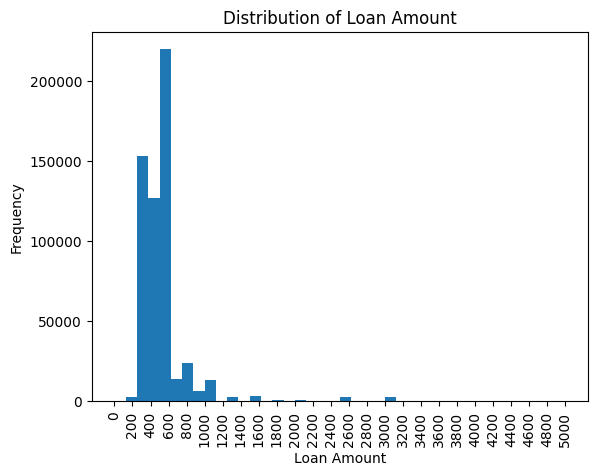

In [58]:
plt.hist(loan_df['loanAmount'], bins=40)

max_loan_amount = loan_df['loanAmount'].max()
rounded_max = math.ceil(max_loan_amount / 500) * 500
plt.xticks(np.arange(0, rounded_max + 1, 200))
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.xticks(rotation=90)
plt.show()

The frequency distribution of Clear Fraud Scores, which range from low to high, is shown in the histogram. A moderate level of risk is most frequently encountered, as indicated by the majority of scores being located in the middle of the scale. A score closer to 0 denotes a reduced danger, whereas a score approaching 1000 may indicate a significant risk. Extreme danger, both high and low, appears to be less common based on the distribution.

Data Exploration 2: Percentage of Loan Statuses by State

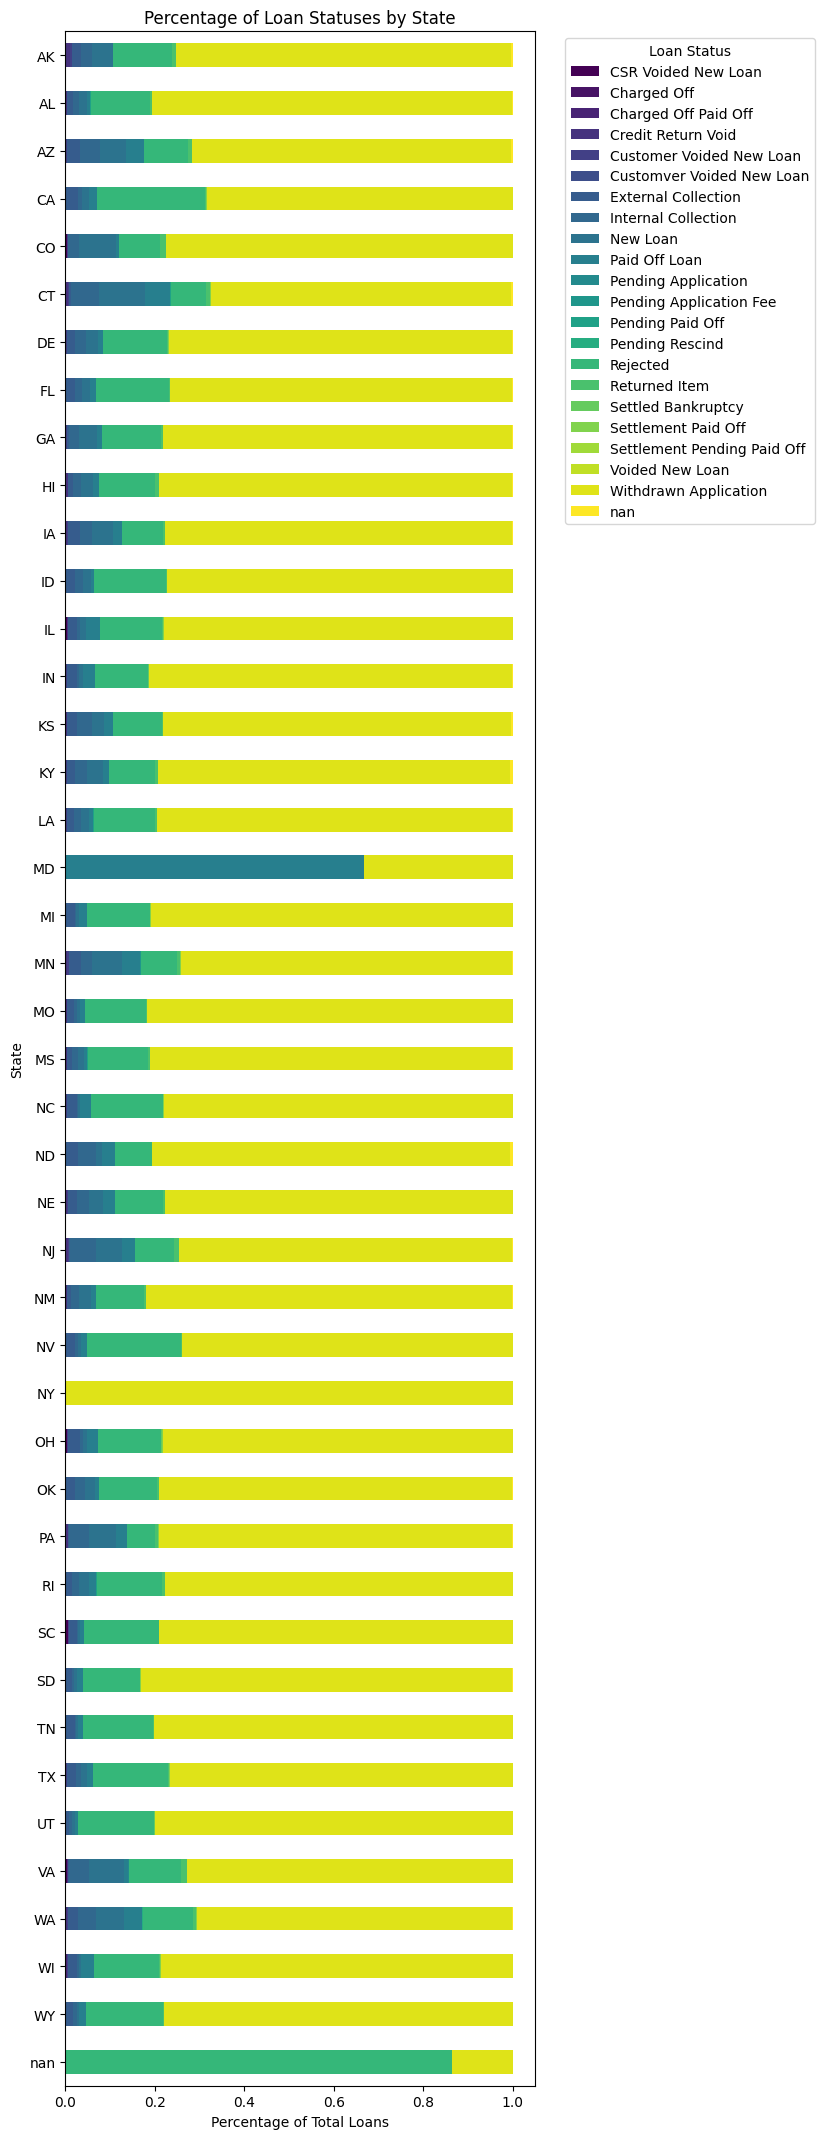

In [59]:
loan_df['state'] = loan_df['state'].astype(str)
loan_df['loanStatus'] = loan_df['loanStatus'].astype(str)

status_counts = loan_df.groupby(['state', 'loanStatus']).size().unstack(fill_value=0)

status_percentages = status_counts.divide(status_counts.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, len(status_percentages) * 0.5)) 

status_percentages.plot(kind='barh', stacked=True, ax=ax, colormap='viridis')

ax.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('Percentage of Total Loans')
ax.set_ylabel('State')
ax.set_title('Percentage of Loan Statuses by State')

ax.invert_yaxis()

plt.tight_layout(rect=[0, 0, 0.85, 1])  

plt.show()

According to this initial peak, smaller loans are significantly more popular than larger ones, which probably reflects the demands and borrowing patterns of the typical consumer. Smaller loans appear to be more common, which could indicate that credit is available to a larger group of people, enabling more of them to seek out financial support for urgent needs.

Data Exploration 3: Loan Status Distribution

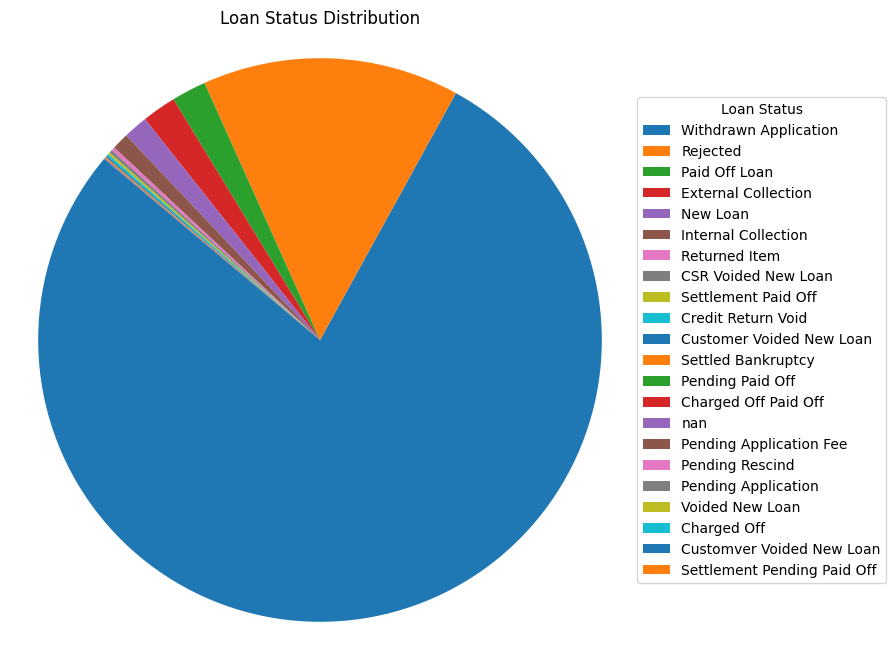

In [60]:
status_counts = loan_df['loanStatus'].value_counts()

plt.figure(figsize=(8, 8))
patches, texts = plt.pie(status_counts, startangle=140)
plt.legend(patches, status_counts.index, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Loan Status Distribution')
plt.axis('equal')  
plt.show()


'Withdrawn Applications' is represented by the most noticeable section, which is displayed in deep blue. These are applications that either had a human underwriter or the customer themselves remove them, or they had been neglected for more than two weeks. The idea of a lack of follow-through or loss of interest is supported by the application timeframes, if there is a trend that shows abandonment after a particular amount of time. 

Data Exploration 4: Loan Frequency by Originated Month, Faceted by Originated Year with Clarity Fraud and without Clarity Fraud

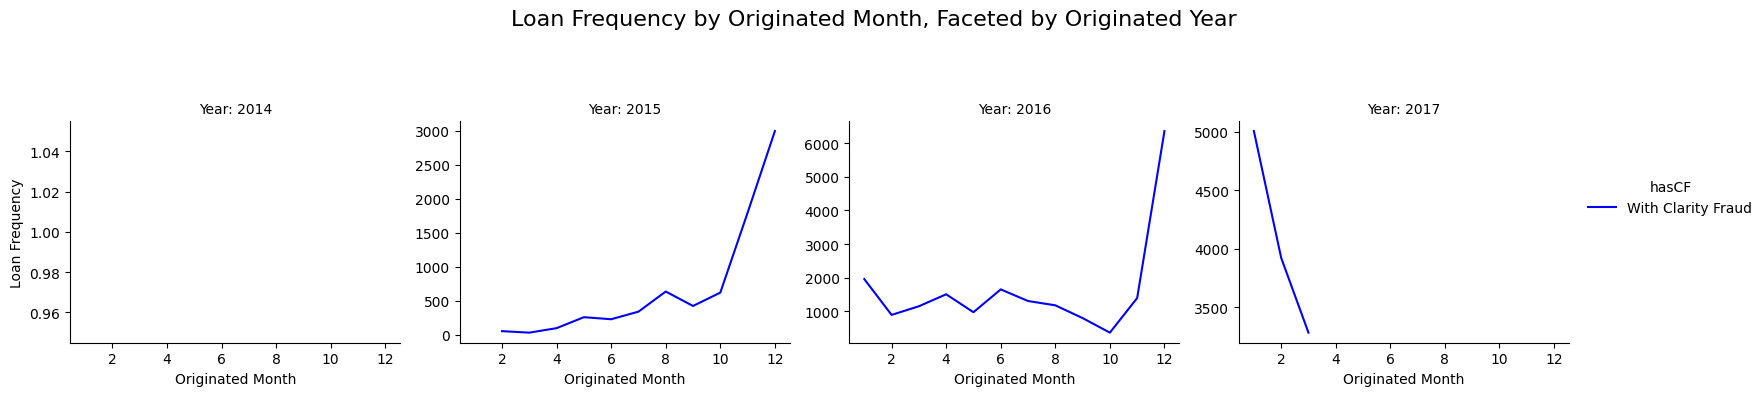

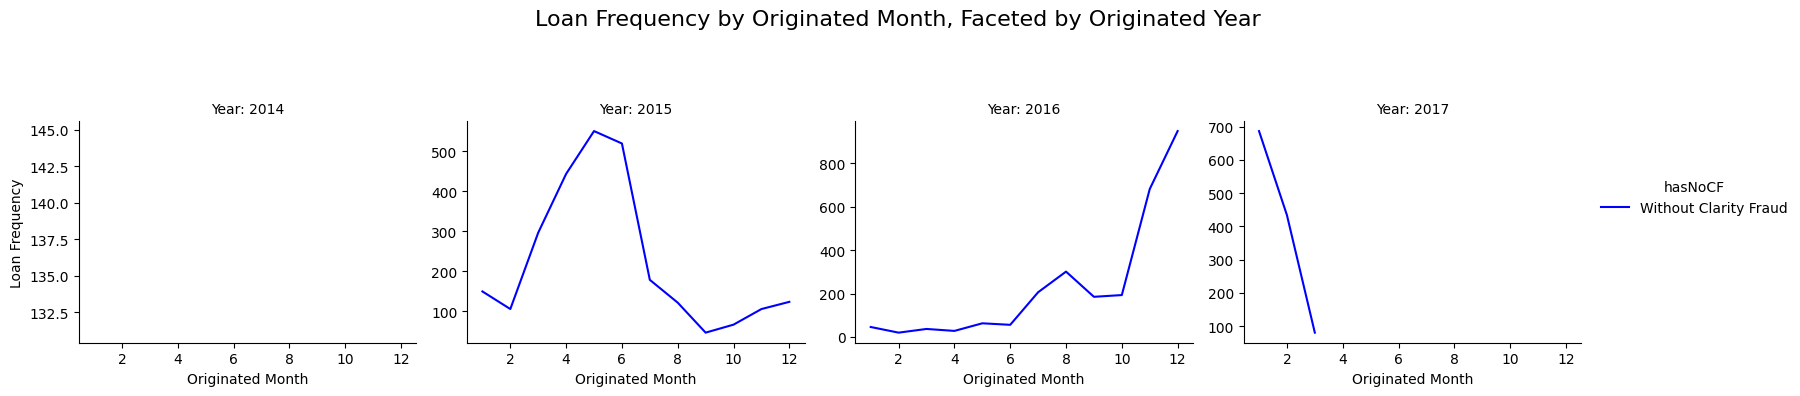

In [61]:
loan_df_hasCF = loan_df[loan_df['hasCF'] == 1]
loan_df_hasnoCF = loan_df[loan_df['hasCF'] == 0]

loan_df_hasCF_freq_df = loan_df_hasCF.groupby(['originatedYear', 'originatedMonth']).size().reset_index(name='loanFrequency')
loan_df_hasnoCF_freq_df = loan_df_hasnoCF.groupby(['originatedYear', 'originatedMonth']).size().reset_index(name='loanFrequency')

loan_df_hasCF_freq_df['hasCF'] = 'With Clarity Fraud'
loan_df_hasnoCF_freq_df['hasNoCF'] = 'Without Clarity Fraud'

combined_df = pd.concat([loan_df_hasCF_freq_df, loan_df_hasnoCF_freq_df])

g = sns.FacetGrid(combined_df, col="originatedYear", col_wrap=4, height=4, sharey=False, hue='hasCF', palette=['blue', 'green'])
g = g.map(sns.lineplot, "originatedMonth", "loanFrequency")
g = g.set_titles("Year: {col_name}")
g = g.set_axis_labels("Originated Month", "Loan Frequency")
plt.subplots_adjust(top=0.7)
g.fig.suptitle('Loan Frequency by Originated Month, Faceted by Originated Year', fontsize=16)
g.add_legend()
plt.show()
g = sns.FacetGrid(combined_df, col="originatedYear", col_wrap=4, height=4, sharey=False, hue='hasNoCF', palette=['blue', 'green'])
g = g.map(sns.lineplot, "originatedMonth", "loanFrequency")
g = g.set_titles("Year: {col_name}")
g = g.set_axis_labels("Originated Month", "Loan Frequency")
plt.subplots_adjust(top=0.7)
g.fig.suptitle('Loan Frequency by Originated Month, Faceted by Originated Year', fontsize=16)
g.add_legend()
plt.show()

plt.show()

The following years are covered: 2014, 2015, 2016, and 2017. 
There is a noticeable peak-to-trough seasonality trend. Additionally, the line is labelled "With Clarity Fraud," indicating that only loans with a fraud indicator from Clarity Fraud are included in the data filter. The end of the year has some obvious peaks. Seasonal financial demands like tax payments or Christmas buying may be the cause of these surges.Year over year, the frequency of loans has increased overall. This trend was particularly apparent in 2015 and 2016. Based on the found trends, marketing opportunities have been discovered.
Loans without Clarity Fraud indicators have a less prominent pattern, however there is still an obvious rise towards the end of 2016. These loans are displayed in the bottom set of graphs. 
Notably, these graph sets' y-axes have different scales, suggesting that a greater proportion of loans overall have Clarity Fraud indications than do not. The difference in magnitude may indicate that a substantial proportion of the total loans bear fraud signs.

Data Exploration 5: Distribution of Payment Frequencies with and without Clarity Fraud

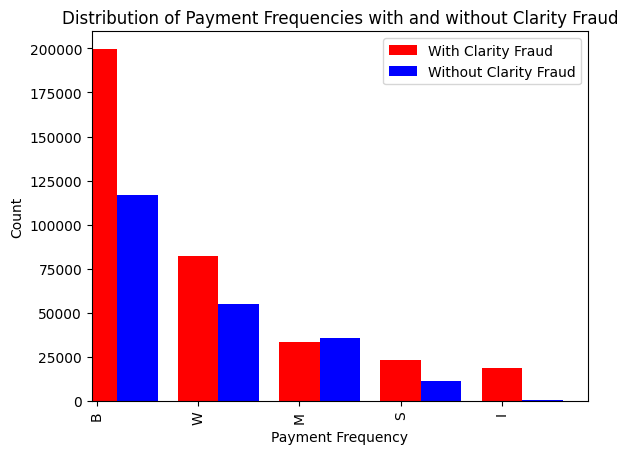

In [62]:
fig, ax = plt.subplots()
loan_df_hasCF['payFrequency'].value_counts().plot(kind='bar', position=0.5, color='red', ax=ax, width=0.4, label='With Clarity Fraud')
loan_df_hasnoCF['payFrequency'].value_counts().plot(kind='bar', position=-0.5, color='blue', ax=ax, width=0.4, label='Without Clarity Fraud')

plt.xlabel('Payment Frequency')
plt.ylabel('Count')
plt.title('Distribution of Payment Frequencies with and without Clarity Fraud')
plt.legend()

# Show plot
plt.show()


Bi-weekly (B), weekly (W), monthly (M), semi-monthly (S), and irregular (I) are the different payment frequency categories. Loans with Clarity Fraud are indicated by red bars, whereas loans without it are indicated by blue bars. 
Loans that fit this schedule may be more well-liked because many borrowers are paid every two weeks. As a result, a greater proportion of loans—both reputable and dishonest—may inherently fit within this group.
In addition, scammers might aim for the most typical payment frequency in order to blend in and lessen the chance of being discovered. 
The risk may be larger for the 'I' category by nature. Loans that do not fit into regular payment plans may be less stable, indicating the borrower's unpredictable financial circumstances, which may be linked to fraudulent conduct on the part of the borrower or as a target for scammers.

Data Exploration 6: Lead Type Frequencies with and without Clarity Fraud

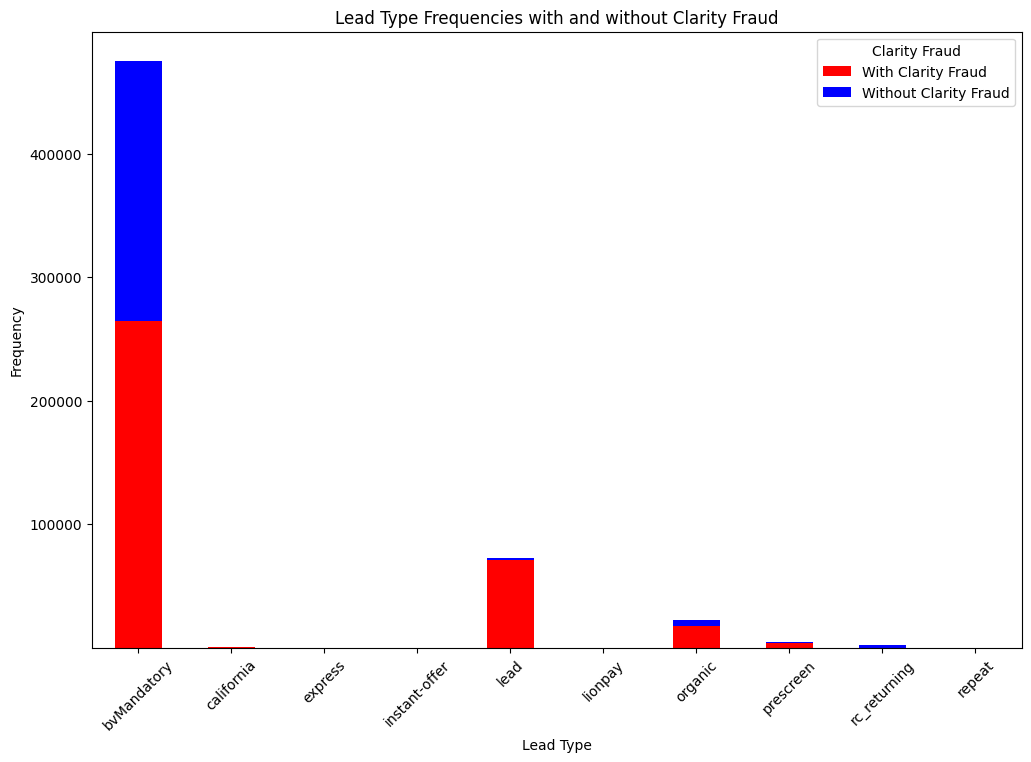

In [63]:
combined_df = pd.concat([loan_df_hasCF.assign(Clarity_Fraud='With Clarity Fraud'), 
                         loan_df_hasnoCF.assign(Clarity_Fraud='Without Clarity Fraud')])
grouped_data = combined_df.groupby(['leadType', 'Clarity_Fraud'], observed=True).size().unstack()

grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'blue'])

plt.title('Lead Type Frequencies with and without Clarity Fraud')
plt.xlabel('Lead Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Clarity Fraud')
plt.show()



When it comes to leads connected to clarity fraud (hasCF) as well as those unconnected to it (hasnoCF), "byMandatory" Lead Type has the greatest count. This suggests that the "byMandatory" category is a well-liked one for obtaining leads. The huge number of leads may be the result of mandated procedures that draw in a sizable consumer base or successful marketing tactics. The ratio of hasCF to hasnoCF indicates that although this category is successful in drawing leads, a sizable portion of those leads would need additional fraud investigation.
Because of its greater percentage of hasCF than hasnoCF, the "lead" group stands out. This might indicate that leads in this category are more likely to be fraudulent or to be reported by Clarity's fraud detection systems. Considerations such as fewer trustworthy sources or fraud-prone channels could be the reason for this, thus it's critical to investigate potential explanations. For leads in this category, it could be necessary to fine-tune the fraud detection procedure or use extra verification procedures.

Data Exploration 7: Trend of Maximum Installment Index for Loans with colllections and non-collections.

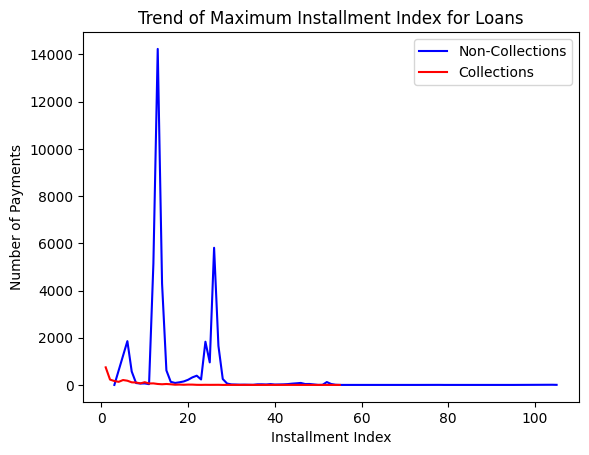

In [64]:
collections_df = payment_df[payment_df['isCollection'] == 1]
noncollections_df = payment_df[payment_df['isCollection'] == 0]

max_noncoll_idx = noncollections_df.groupby('loanId')['installmentIndex'].max()
max_coll_idx = collections_df.groupby('loanId')['installmentIndex'].max()
noncoll_freq = max_noncoll_idx.value_counts().sort_index()

coll_freq = max_coll_idx.value_counts().sort_index()

plt.plot(noncoll_freq.index, noncoll_freq.values, color='blue', label='Non-Collections')

plt.plot(coll_freq.index, coll_freq.values, color='red', label='Collections')

plt.xlabel('Installment Index')
plt.ylabel('Number of Payments')
plt.title('Trend of Maximum Installment Index for Loans')
plt.legend()
plt.show()


The blue line, which stands for "Non-Collections," exhibits a notable peak. This implies that many loans have low installment indices, indicating that many borrowers are either only starting to repay their debts or that the loans are not long-term. The frequency of "Collections," represented by the red line on the installment index, is substantially lower. This suggests that there are less loans in collections as opposed to non-collections loans. The "Collections" curve rises early and then falls off quickly, staying mostly flat over the course of the installment index. This pattern would suggest that loans have a higher likelihood of going into collections early rather than later in the repayment plan. 
Due to the concentration of loans in the early installment index, the institution may decide to modify its risk assessment approach for longer-term loans and concentrate on short-term loan products early in the loan process in order to prevent default.


Data Exploration 8: Distribution of Max Installment Index by Clarity Fraud Status for each Collection Type

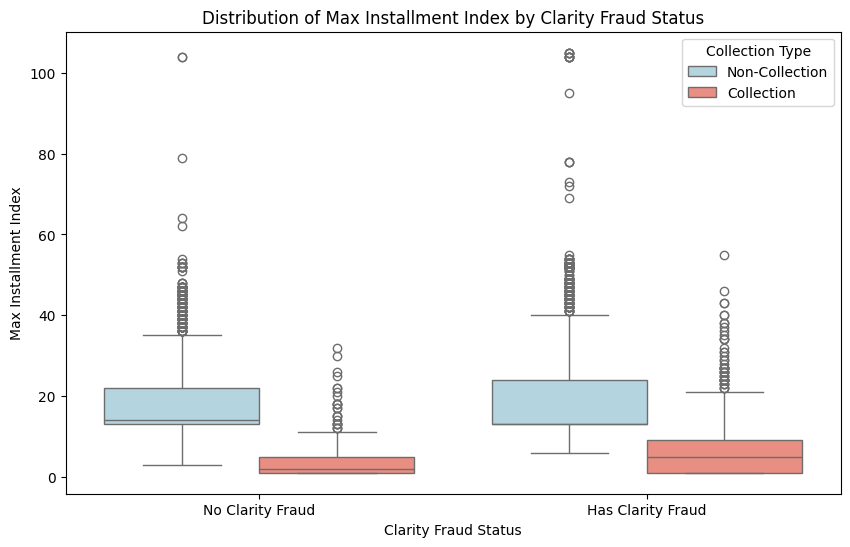

In [65]:
loan_df['hasCF'] = loan_df['hasCF'].replace({True: 'Has Clarity Fraud', False: 'No Clarity Fraud'})

max_noncoll_idx = noncollections_df.groupby('loanId')['installmentIndex'].max().reset_index(name='maxNonCollIdx')
max_coll_idx = collections_df.groupby('loanId')['installmentIndex'].max().reset_index(name='maxCollIdx')

loan_underwriting_df = loan_df.merge(max_noncoll_idx, on='loanId', how='left')
loan_underwriting_df = loan_underwriting_df.merge(max_coll_idx, on='loanId', how='left')

melted_df = pd.melt(loan_underwriting_df, id_vars=['loanId', 'hasCF'], value_vars=['maxNonCollIdx', 'maxCollIdx'],
                    var_name='PaymentType', value_name='MaxInstallmentIndex')

melted_df['PaymentType'] = melted_df['PaymentType'].map({
    'maxNonCollIdx': 'Non-Collection',
    'maxCollIdx': 'Collection'
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='hasCF', y='MaxInstallmentIndex', hue='PaymentType',
            palette={'Non-Collection': 'lightblue', 'Collection': 'salmon'})

plt.xticks([0, 1], ['No Clarity Fraud', 'Has Clarity Fraud'])

plt.xlabel('Clarity Fraud Status')
plt.ylabel('Max Installment Index')
plt.title('Distribution of Max Installment Index by Clarity Fraud Status')

plt.legend(title='Collection Type')

plt.show()


The median maximum installment index for both collections and non-collections for loans without Clarity Fraud is comparatively low, which may indicate that the terms of these loans are generally shorter.
When comparing loans with and without Clarity Fraud, the median for all categories is greater for loans with Clarity Fraud, suggesting that these loans may have longer periods overall.
When comparing loans without Clarity Fraud to those in collections, loans with Clarity Fraud typically have a little higher median installment index. This may imply that loans having a fraud signal have longer durations and a higher chance of being collected.
A bigger variance in repayment behaviour is suggested by the wider interquartile range for loans with Clarity Fraud in non-collections, which can be significant for risk assessment and management.


Data Exploration 9: Count of True Fraud Indicators

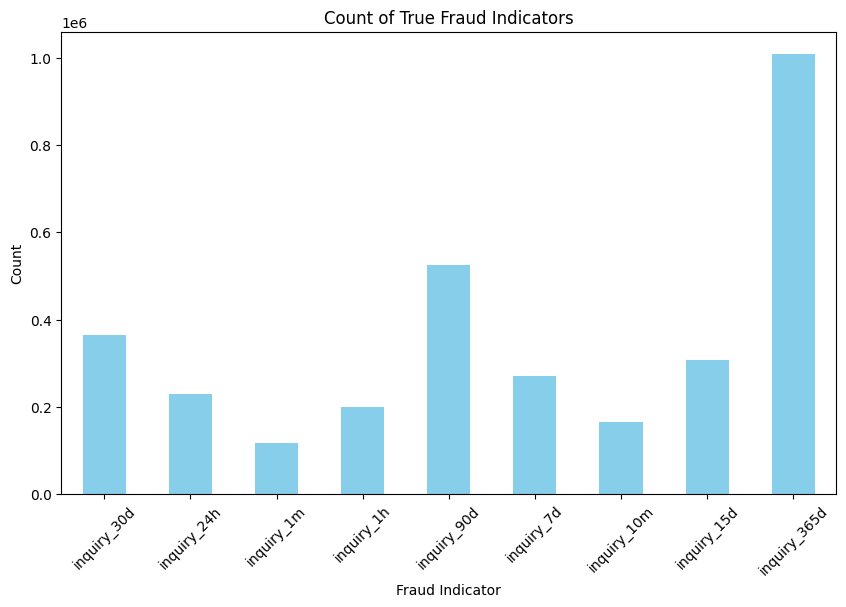

In [66]:
inquiry_columns = [col for col in clarity_underwriting_df.columns if col.startswith('inquiry_')]

fraud_indicator_counts = clarity_underwriting_df[inquiry_columns].sum()

plt.figure(figsize=(10, 6))
fraud_indicator_counts.plot(kind='bar', color='skyblue')
plt.title('Count of True Fraud Indicators')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

'inquiry_365d' is a standout category that suggests a large number of further fraudulent patterns or behaviours are found over an extended period of time. Although they display greater counts than the shortest terms, mid-term inquiries (such as "inquiry_90d" and "inquiry_30d") nonetheless have a significantly lower count than the annual inquiry. This may imply that certain fraudulent acts happen occasionally across several months or require time to be discovered.One may assume that monitoring for fraud over longer time periods will produce true indicators of fraudulent behaviour based on the information shown in the chart. This may be because fraud is by its very nature characterised by patterns and behaviours that emerge and identify themselves over time.

Data Exploration 10: Distribution of Clear Fraud Scores

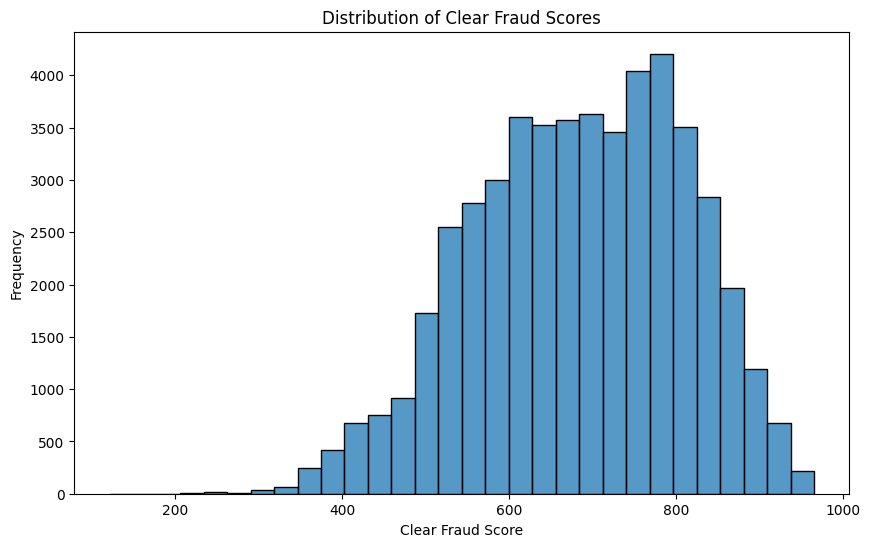

In [67]:
clarity_underwriting_df['clearfraudscore'] = pd.to_numeric(clarity_underwriting_df['clearfraudscore'], errors='coerce')

clarity_underwriting_df = clarity_underwriting_df.dropna(subset=['clearfraudscore'])

plt.figure(figsize=(10, 6))
sns.histplot(clarity_underwriting_df['clearfraudscore'], bins=30, kde=False)
plt.title('Distribution of Clear Fraud Scores')
plt.xlabel('Clear Fraud Score')
plt.ylabel('Frequency')
plt.show()

The frequency distribution of Clear Fraud Scores, which range from low to high, is shown in the histogram. A moderate level of risk is most frequently encountered, as indicated by the majority of scores being located in the middle of the scale. A score closer to 0 denotes a reduced danger, whereas a score approaching 1000 may indicate a significant risk. Extreme danger, both high and low, appears to be less common based on the distribution.

Data Exploration 11: Count of True for Each Identity Verification Indicator

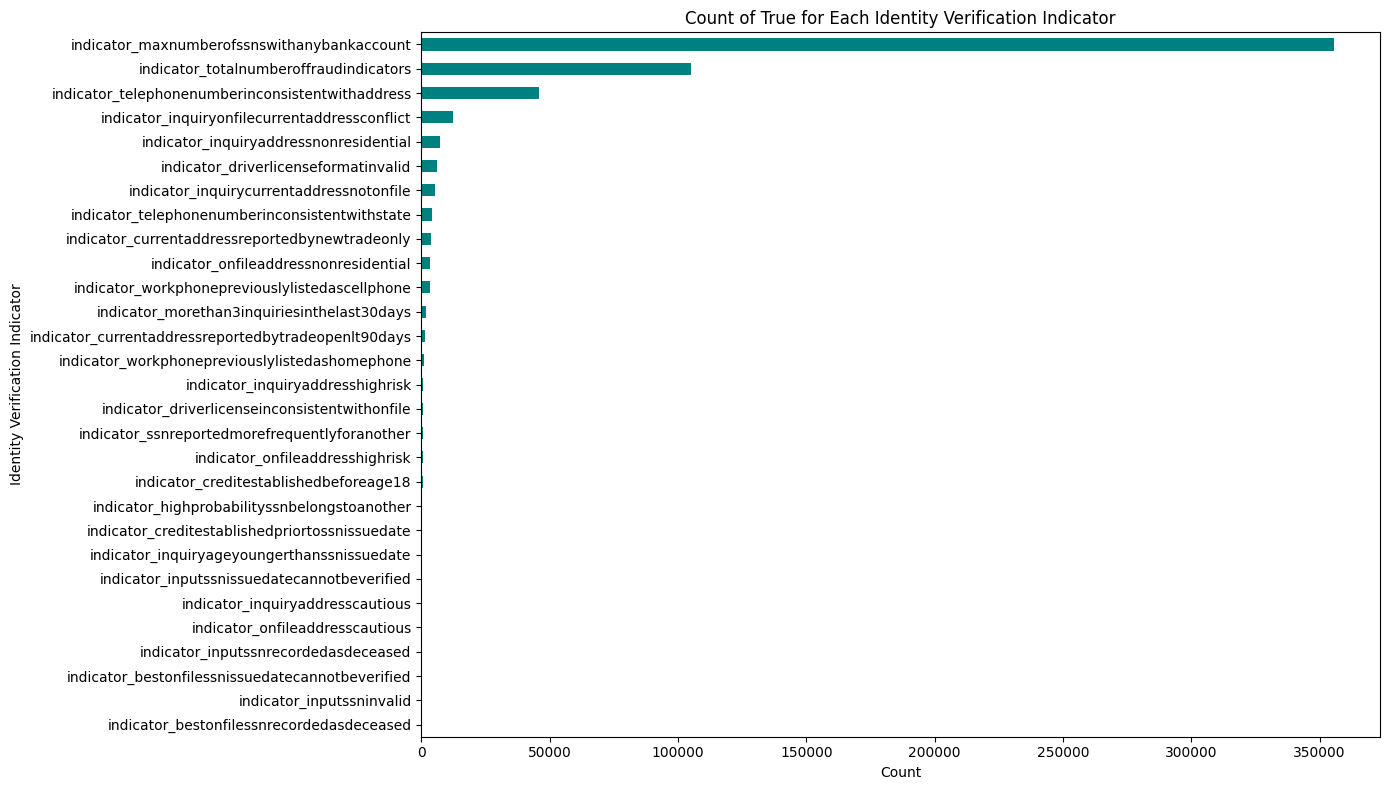

In [68]:
indicator_columns = [col for col in clarity_underwriting_df.columns if col.startswith('indicator_')]

indicator_counts = clarity_underwriting_df[indicator_columns].sum()

plt.figure(figsize=(14, 8))
indicator_counts.sort_values().plot(kind='barh', color='teal')
plt.title('Count of True for Each Identity Verification Indicator')
plt.xlabel('Count')
plt.ylabel('Identity Verification Indicator')
plt.tight_layout()
plt.show()


The indicators of identity verification are arranged in the chart based on how frequently they occur. It is clear that some indicators are more common than others;.The most common indication is 'indicator_maxnumberofssnswithanybankaccount'. This could point to a high frequency of SSNs linked to a single bank account, which could be a sign of fraud. Certain indicators point to specific areas of concern, such as "indicator_telephonenumberinconsistentwithaddress" and "indicator_inquiryonfilecurrentaddressnotonfile." For example, inconsistencies between address and phone number information, or recent inquiries that do not match the address on file, may be signs of identity theft or application fraud. This could play a key role in improving verification processes or strengthening fraud detection protocols.

Merge loan_df with clarity_underwriting_df,  joined on matching columns 'clarityFraudId' and 'underwritingid'.

In [69]:
loan_underwriting_df = loan_df.merge(clarity_underwriting_df, left_on='clarityFraudId', right_on='underwritingid', how='left')
loan_underwriting_df.head()

loanId                          anon_ssn payFrequency    apr  \
0  LL-I-07399092  beff4989be82aab4a5b47679216942fd            B  360.0   
1  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
2  LL-I-10707532  3c174ae9e2505a5f9ddbff9843281845            B  590.0   
3  LL-I-02272596  9be6f443bb97db7e95fa0c281d34da91            B  360.0   
4  LL-I-09542882  63b5494f60b5c19c827c7b068443752c            B  590.0   

          applicationDate  originated          originatedDate  nPaidOff  \
0 2016-02-23 17:29:01.940       False                     NaT       0.0   
1 2016-01-19 22:07:36.778        True 2016-01-20 15:49:18.846       0.0   
2 2016-08-01 13:51:14.709       False                     NaT       0.0   
3 2015-08-06 23:58:08.880       False                     NaT       0.0   
4 2016-06-05 22:31:34.304       False                     NaT       0.0   

   approved  isFunded  ... identityverification_phonematchtypedescription  \
0     False         0  ...                                            NaN   
1      True         1  ...                                            NaN   
2     False         0  ...                                            NaN   
3     False         0  ...                                            NaN   
4     False         0  ...                                            NaN   

   identityverification_overallmatchresult  identityverification_phonetype  \
0                                      NaN                             NaN   
1                                  partial                             NaN   
2                                      NaN                             NaN   
3                                      NaN                             NaN   
4                                      NaN                             NaN   

  identityverification_ssndobreasoncode  \
0                                   NaN   
1                                   D04   
2                                   NaN   
3                                   NaN   
4                                   NaN   

  identityverification_ssnnamereasoncode  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   identityverification_nameaddressreasoncode  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

  identityverification_ssndobmatch  \
0                              NaN   
1                          invalid   
2                              NaN   
3                              NaN   
4                              NaN   

  identityverification_overallmatchreasoncode  clearfraudscore  \
0                                         NaN              NaN   
1                                         5.0            879.0   
2                                         NaN              NaN   
3                                         NaN              NaN   
4                                         NaN              NaN   

             underwritingid  
0                       NaN  
1  569eb3a3e4b096699f685d64  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 77 columns]

There are 4 main questions along with several sub-questions to be analyzed here:

Main Question 1: How do applicants' characteristics influence loan repayment?

Sub-question 1.1: Impact of pay frequency and state on loan repayment

Data Exploration: Pivot table - summarize average loan amounts and repayment rates by `payFrequency` and `state`.

In [70]:
repaid_statuses = ['Paid Off Loan', 'Settlement Paid Off']
loan_df['loanRepaidStatus'] = loan_df['loanStatus'].apply(lambda x: 1 if x in repaid_statuses else 0)
temp_loan_df = loan_df.dropna(subset=['state', 'payFrequency'])
temp_loan_df.loc[:, 'state'] = temp_loan_df['state'].astype('category')
temp_loan_df.loc[:, 'payFrequency'] = temp_loan_df['payFrequency'].astype('category')
grouped = temp_loan_df.groupby(['state', 'payFrequency'], observed=True).agg(
    average_loan_amount=pd.NamedAgg(column='loanAmount', aggfunc='mean'),
    repayment_rate=pd.NamedAgg(column='loanRepaidStatus', aggfunc='mean')
)
grouped_reset = grouped.reset_index()
print(grouped_reset.to_string(index=False))


state payFrequency  average_loan_amount  repayment_rate
   AK            B           514.224138        0.000000
   AK            M           480.555556        0.000000
   AK            S           545.161290        0.000000
   AK            W           512.765957        0.000000
   AL            B           440.928495        0.014377
   AL            I           934.000000        0.000000
   AL            M           418.803879        0.008621
   AL            S           467.780172        0.008621
   AL            W           436.320755        0.002859
   AZ            B           546.510593        0.047669
   AZ            M           457.218519        0.014815
   AZ            S           576.718750        0.043750
   AZ            W           479.793341        0.030999
   CA            B           906.613681        0.019887
   CA            I           939.824959        0.001621
   CA            M           973.439252        0.016940
   CA            S          1036.056333        0

It is evident that each state has different average loan amounts and repayment rates, as does the frequency of payments. For example, the average loan amount in Alaska (AK) for bi-weekly installments (B) is $514.224138, and the payback rate is zero. Repayment rates of 0 indicate that there were none in that specific category.

Analysis 1: Compare loan repayment rates by `payFrequency`.

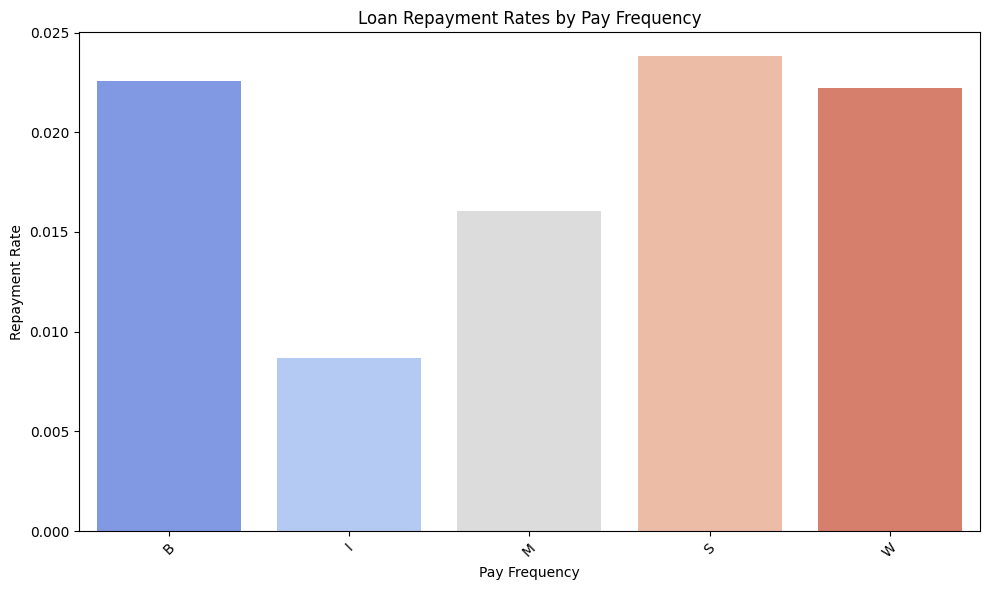

In [71]:
warnings.simplefilter(action='ignore', category=FutureWarning)
repayment_rate_by_payFrequency = loan_df.groupby('payFrequency')['loanRepaidStatus'].mean().reset_index()

repayment_rate_by_payFrequency = repayment_rate_by_payFrequency.sort_values(by='loanRepaidStatus', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='payFrequency', y='loanRepaidStatus', data=repayment_rate_by_payFrequency, palette='coolwarm')
plt.title('Loan Repayment Rates by Pay Frequency')
plt.xlabel('Pay Frequency')
plt.ylabel('Repayment Rate')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

warnings.simplefilter(action='default', category=FutureWarning)

The 'S' category with the greatest payback rate may indicate that borrowers who make payments on a regular basis are more dependable in fulfilling their loan commitments. Higher payback rates may result from stronger money management in those who select or are assigned to the "B," "S," and "W" payment frequency categories.A larger risk may be connected to this frequency of payments, as indicated by the lower repayment rates in the 'I' group. Lower repayment rates may be a sign of increased risk, something that lenders should take into account before granting credit.

Analysis 2: Visualize the loan amount distribution by `state`.

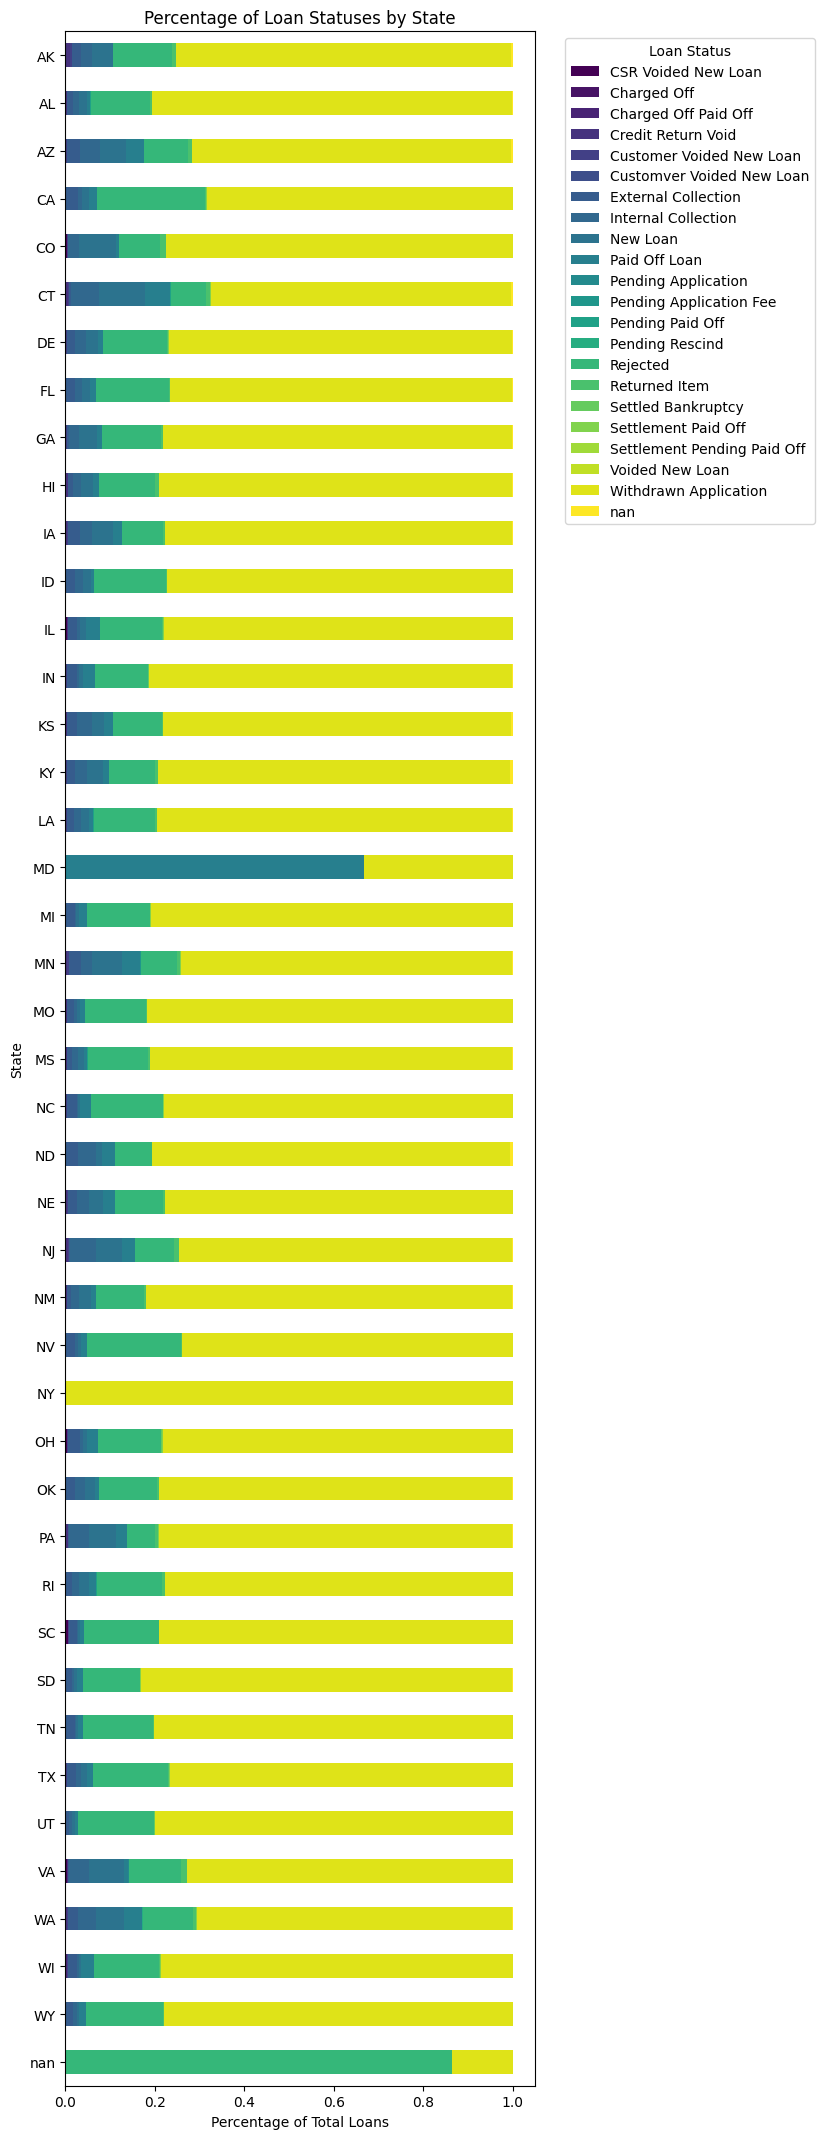

In [72]:
loan_df['state'] = loan_df['state'].astype(str)
loan_df['loanStatus'] = loan_df['loanStatus'].astype(str)

status_counts = loan_df.groupby(['state', 'loanStatus']).size().unstack(fill_value=0)

status_percentages = status_counts.divide(status_counts.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, len(status_percentages) * 0.5)) 

status_percentages.plot(kind='barh', stacked=True, ax=ax, colormap='viridis')

ax.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('Percentage of Total Loans')
ax.set_ylabel('State')
ax.set_title('Percentage of Loan Statuses by State')

ax.invert_yaxis()

plt.tight_layout(rect=[0, 0, 0.85, 1])  

plt.show()

In the state of New York, there is only one loan status, whicih is Withdrawn Application. Besides, a significant portion of applications have been withdrawn in each state. Potential borrowers may be withdrawing their applications due to problems with the application procedure. This can be the result of procedure complexity, or approval time.

Analysis 3: Treemap of Loan Repayment Rates by State

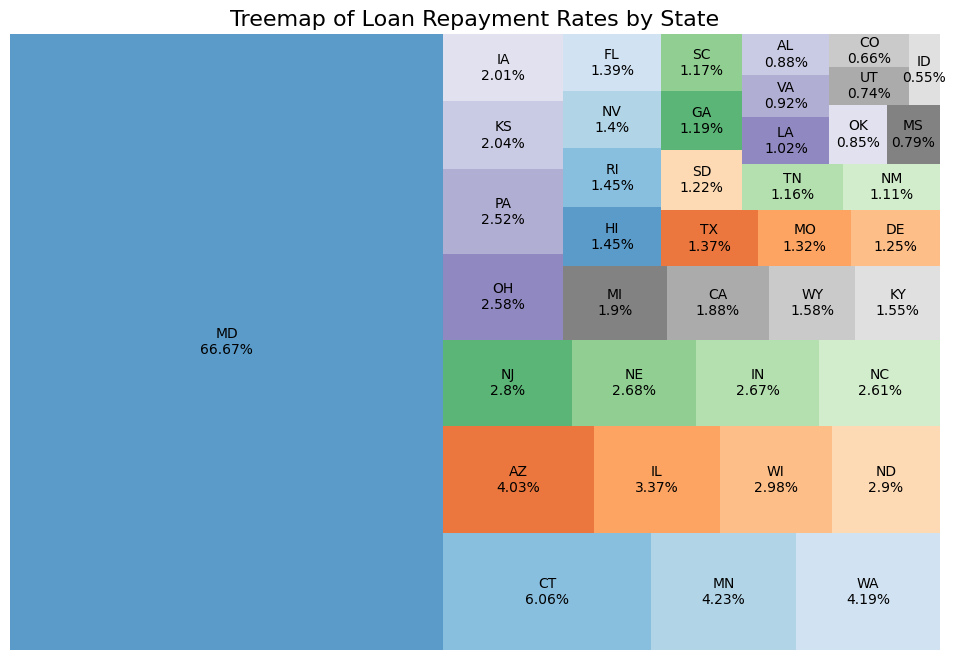

In [73]:
repayment_by_state = loan_df.groupby('state')['loanRepaidStatus'].mean().reset_index()
repayment_by_state['loanRepaidStatus'] = (repayment_by_state['loanRepaidStatus'] * 100).round(2) 

repayment_by_state = repayment_by_state[repayment_by_state['loanRepaidStatus'] > 0]

repayment_by_state_sorted = repayment_by_state.sort_values(by='loanRepaidStatus', ascending=False)

colors = plt.cm.tab20c.colors

num_colors = len(colors)
repeated_colors = [colors[i % num_colors] for i in range(len(repayment_by_state_sorted))]

fig, ax = plt.subplots(figsize=(12, 8))

squarify.plot(sizes=repayment_by_state_sorted['loanRepaidStatus'], 
              label=repayment_by_state_sorted['state'] + '\n' + repayment_by_state_sorted['loanRepaidStatus'].astype(str) + '%', 
              color=repeated_colors, alpha=0.8, ax=ax)

ax.axis('off')
ax.set_title('Treemap of Loan Repayment Rates by State', fontsize=16)
plt.show()

The treemap is dominated by Maryland (MD), suggesting that the state has a greater loan payback rate than the other states. This may indicate a more stable state of the economy, improved borrower creditworthiness, or more efficient collection procedures in that state.Smaller blocks in a number of states, including Wyoming (WY), Mississippi (MS), and Idaho (ID), could be an indication of reduced loan issuance volumes or repayment rates. 

Analysis 3: Merge `loan.csv` and `payment.csv` to analyze `payFrequency`, and `paymentStatus` by `RepaymentRate`.

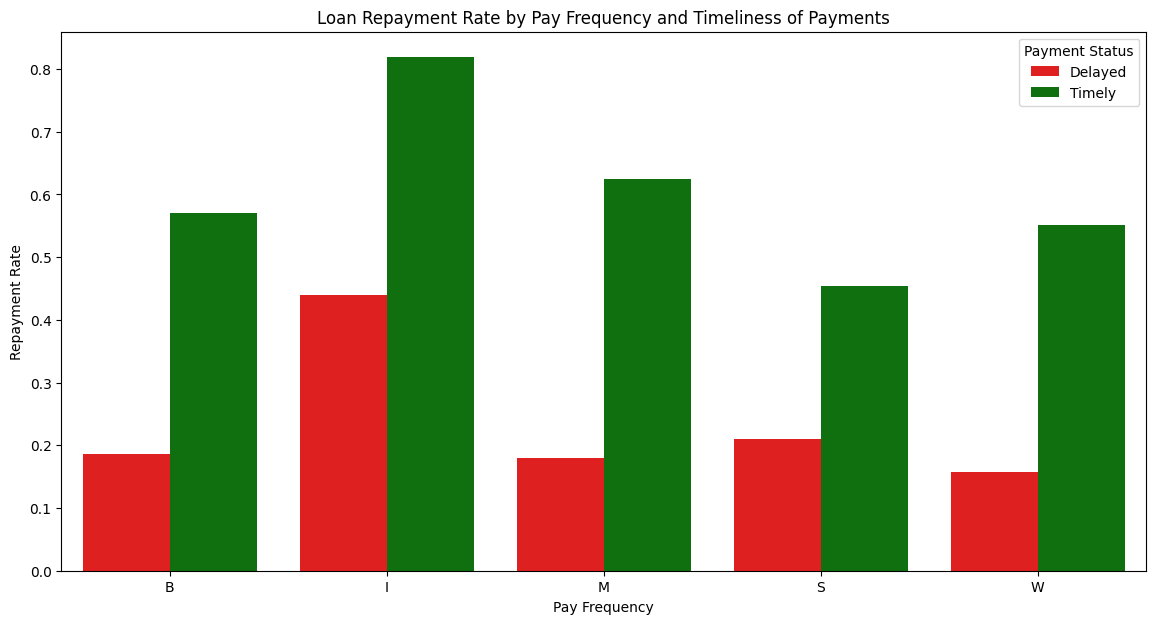

In [74]:
loan_payment_df = pd.merge(loan_df, payment_df, on='loanId', how='inner')

loan_payment_df['Timely_Payment'] = loan_payment_df['paymentStatus'] == 'Checked'
loan_payment_df['Timely_Payment'] = loan_payment_df['Timely_Payment'].astype('category')
loan_payment_df['Timely_Payment'] = loan_payment_df['Timely_Payment'].cat.rename_categories({True: 'Timely', False: 'Delayed'})

plt.figure(figsize=(14, 7))
sns.barplot(data=loan_payment_df, x='payFrequency', y='loanRepaidStatus', hue='Timely_Payment',
            palette={'Timely': 'green', 'Delayed': 'red'}, errorbar=None)
plt.title('Loan Repayment Rate by Pay Frequency and Timeliness of Payments')
plt.xlabel('Pay Frequency')
plt.ylabel('Repayment Rate')
plt.legend(title='Payment Status', loc='upper right')
plt.show()


The biggest difference between timely and delayed payback rates is seen in monthly payments. This suggests that people who make monthly payments are more likely to do so if they adhere to a plan. There is a large proportion of payback that is delayed, but there is also a high rate of timely repayment for weekly payments. It could imply that even though many borrowers find the frequency comfortable, there is still a portion of borrowers who find it difficult to meet their weekly financial commitments.

Sub-question 1.2: Relationship between previous loan performance and new loan risk

Data Exploration: Calculate the proportion of loans with various `nPaidOff` values that fall into each `loanStatus` category.

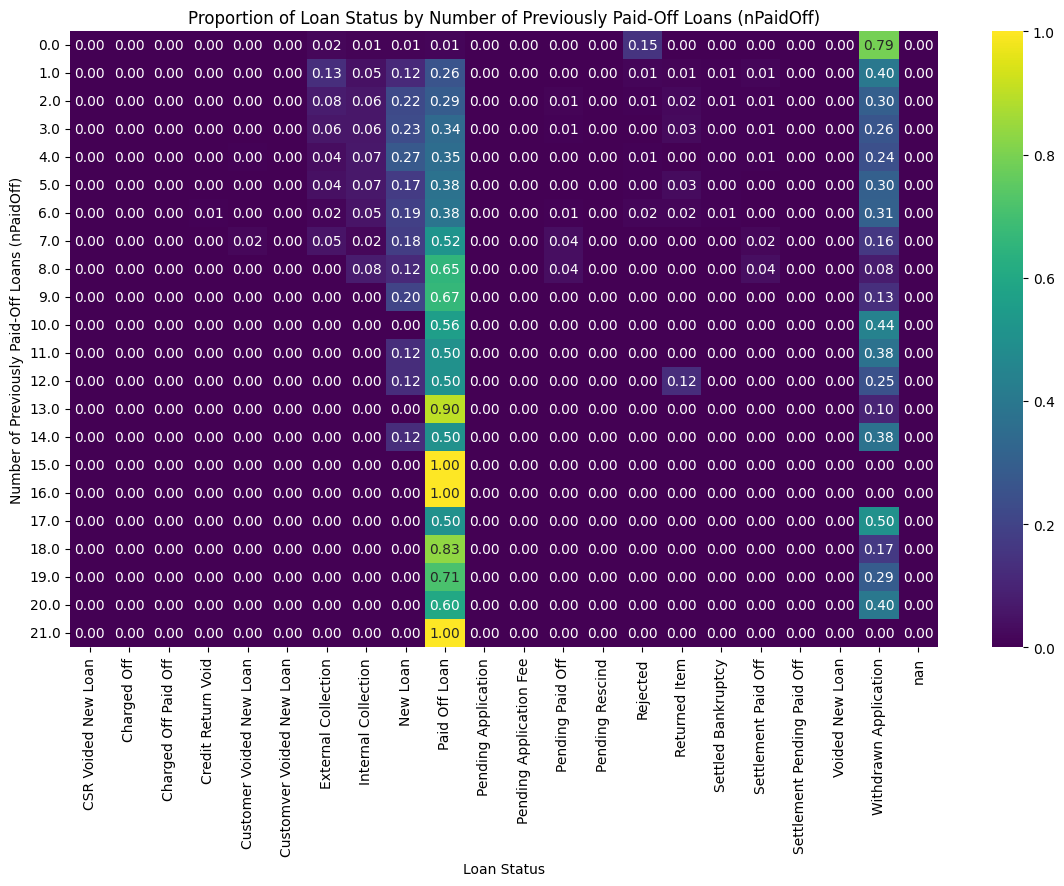

In [75]:
loan_status_distribution = loan_df.groupby(['nPaidOff', 'loanStatus']).size().unstack(fill_value=0)

loan_status_proportion = loan_status_distribution.div(loan_status_distribution.sum(axis=1), axis=0)

plt.figure(figsize=(14, 8))
sns.heatmap(loan_status_proportion, annot=True, cmap='viridis', fmt=".2f")
plt.title('Proportion of Loan Status by Number of Previously Paid-Off Loans (nPaidOff)')
plt.xlabel('Loan Status')
plt.ylabel('Number of Previously Paid-Off Loans (nPaidOff)')
plt.show()

The percentage of different loan statuses divided by the total number of loans that have already been paid off is displayed in the heatmap. For borrowers with a specific number of previously paid-off loans, each heatmap cell displays a ratio (between 0 and 1) representing the percentage of loans in a given status compared to the total number of loans.In the "Paid Off Loan" column, the cells with a proportion of 1.00 signify that all loans made to borrowers who have that particular number of previously paid-off loans (for example, 16, 20, 21) have been repaid. This might point to a very trustworthy group of borrowers. There is a higher percentage of "New Loan" status for borrowers who have never paid off a loan before, indicating that they are either new to this lender or are currently in the application process.

Analysis 1:  `nPaidOff` vs. `loanAmount` colored by `loanStatus` to assess if more previous loans paid off correlate with larger new loan amounts or better repayment rates.

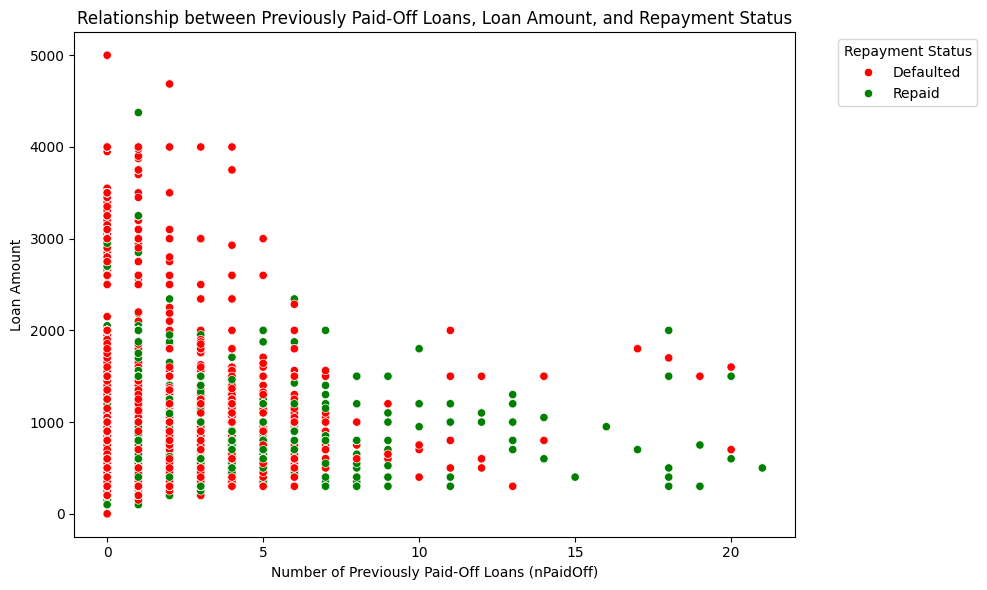

In [76]:
repaid_statuses = ['Paid Off Loan', 'Settlement Paid Off']
loan_df['loanRepaidStatus'] = loan_df['loanStatus'].apply(lambda x: 'Repaid' if x in repaid_statuses else 'Defaulted')

loan_df['loanRepaidStatus'] = loan_df['loanRepaidStatus'].astype('category')

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=loan_df, x='nPaidOff', y='loanAmount', hue='loanRepaidStatus', palette={'Repaid': 'green', 'Defaulted': 'red'})

plt.title('Relationship between Previously Paid-Off Loans, Loan Amount, and Repayment Status')
plt.xlabel('Number of Previously Paid-Off Loans (nPaidOff)')
plt.ylabel('Loan Amount')

plt.legend(title='Repayment Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


The scatter plot shows the correlation between a borrower's total amount of loans, the number of previously paid-off loans (nPaidOff), and whether or not those loans were repaid. The number of non-repaid loans (red dots) falls as the number of previously paid-off loans rises, which might suggest that borrowers who have a history of repaying debts are more likely to do so in the future.

Analysis 2: Heatmap showing the correlation between `apr` and loan repayment status across different `loanAmount` ranges.

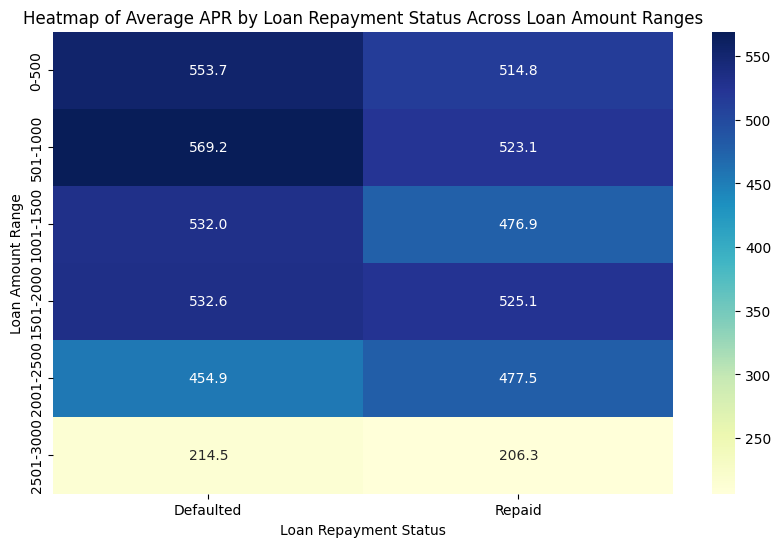

In [77]:
loan_df['loanRepaidStatus'] = loan_df['loanRepaidStatus'].astype('category')

loan_amount_bins = [0, 500, 1000, 1500, 2000, 2500, 3000]  
loan_amount_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000']
loan_df['loanAmountRange'] = pd.cut(loan_df['loanAmount'], bins=loan_amount_bins, labels=loan_amount_labels)

pivot_table = loan_df.pivot_table(values='apr', index='loanAmountRange', columns='loanRepaidStatus', aggfunc='mean',observed=True)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Average APR by Loan Repayment Status Across Loan Amount Ranges')
plt.ylabel('Loan Amount Range')
plt.xlabel('Loan Repayment Status')
plt.show()


The heatmap displays the correlation between various loan amount ranges, loan repayment status, and annual percentage rate (APR). Lighter hues on the heatmap denote lower APRs, whereas darker hues indicate higher APRs. The heatmap is color-coded to show the average APR.Loans that were repaid ("Repaid") and those that weren't ("Non-Repaid") are shown on the x-axis.Loans are categorised into various ranges on the y-axis according to the amount borrowed. Smaller loan amounts typically have a higher annual percentage rate (APR), especially for unpaid loans. This can be a sign of a larger risk involved in these loans or an approach to make up for the smaller borrowing quantities.

Sub-question 1.3: Effect of APR on loan repayment across different loan amounts

Data Exploration: Assess the distribution of `apr` across loans with different `loanStatus` outcomes.

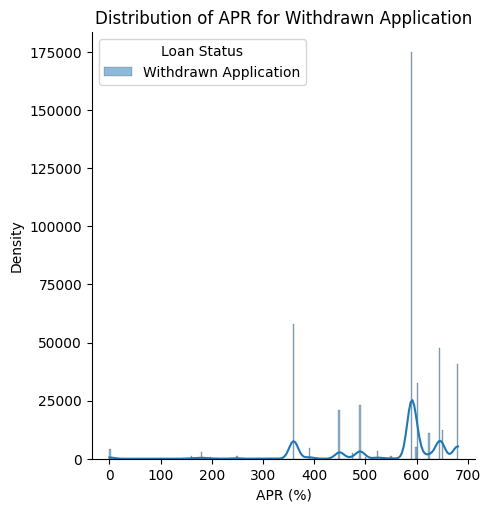

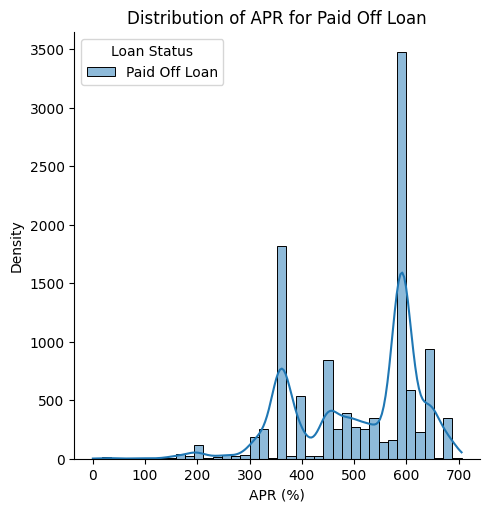

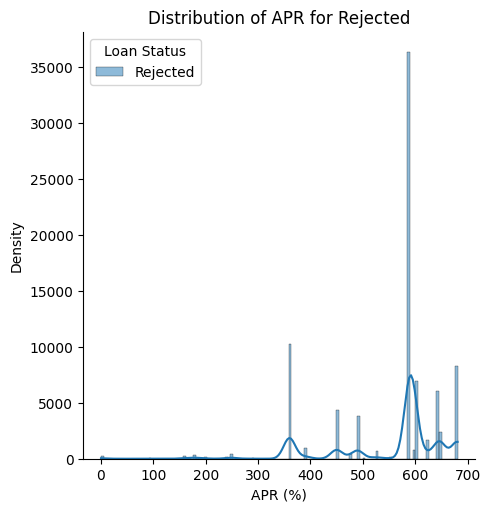

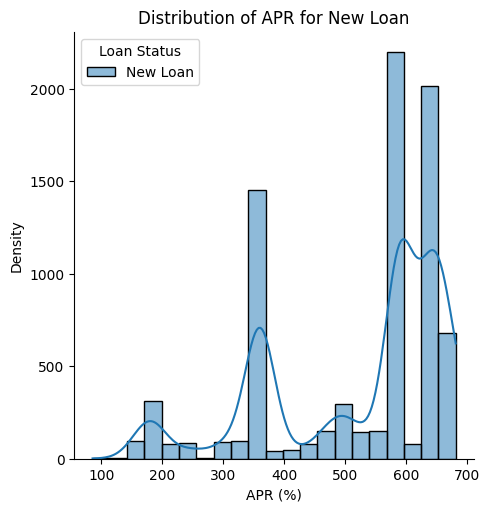

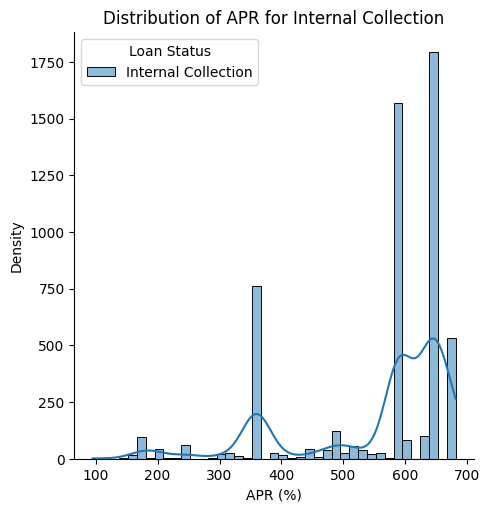

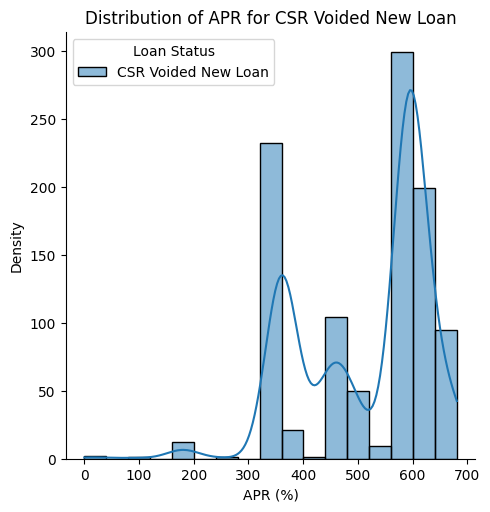

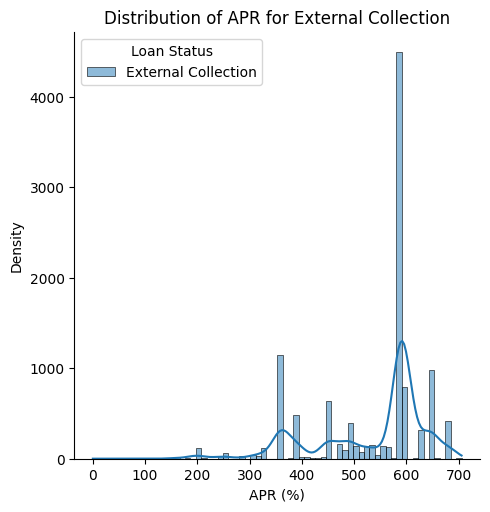

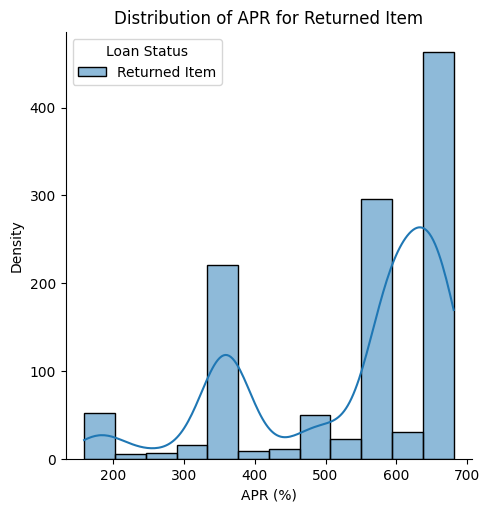

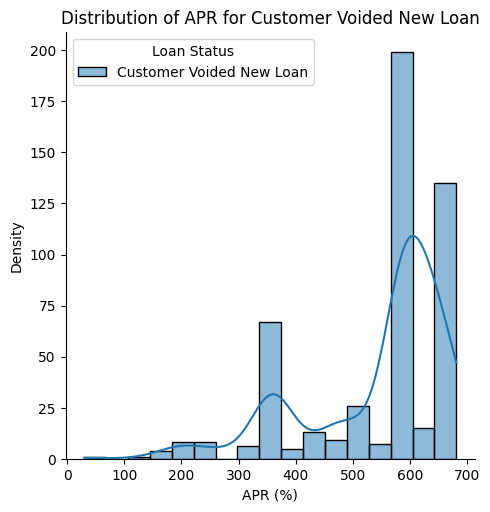

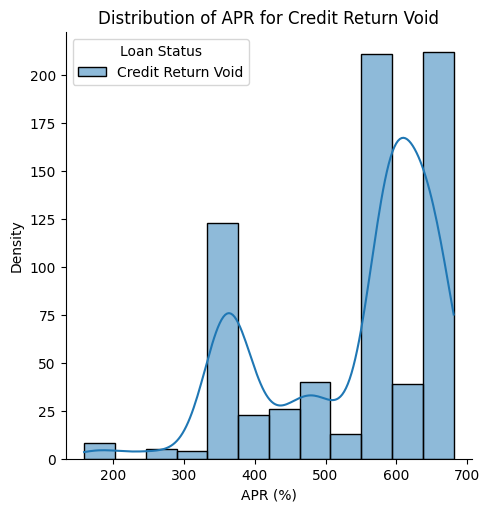

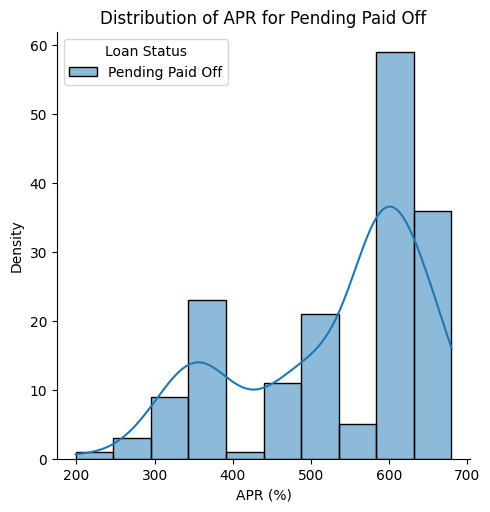

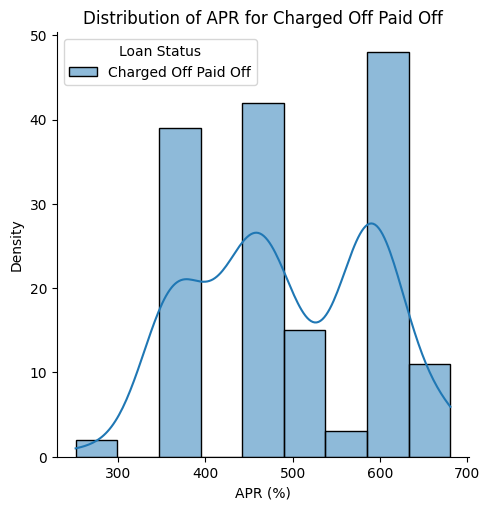

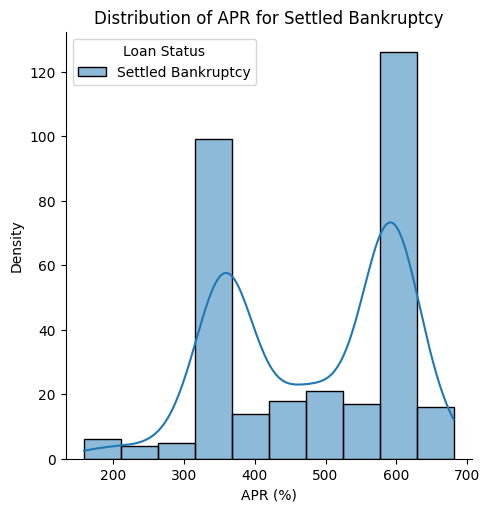

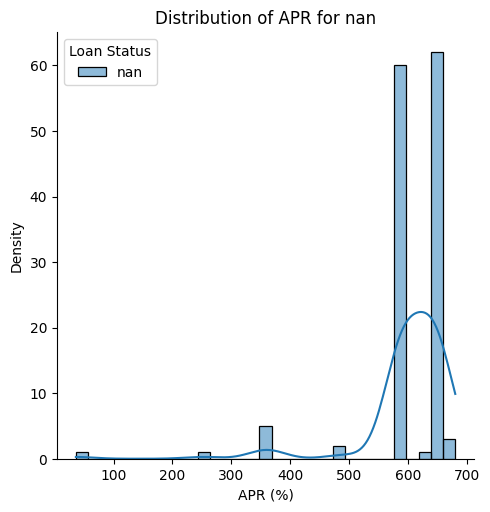

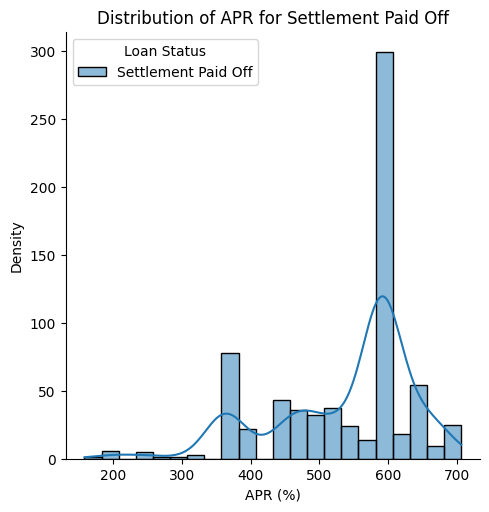

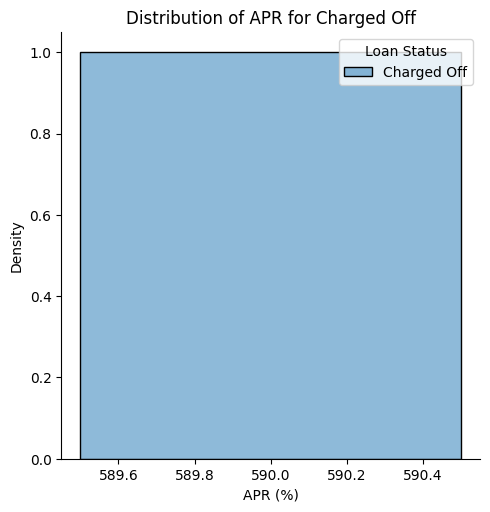

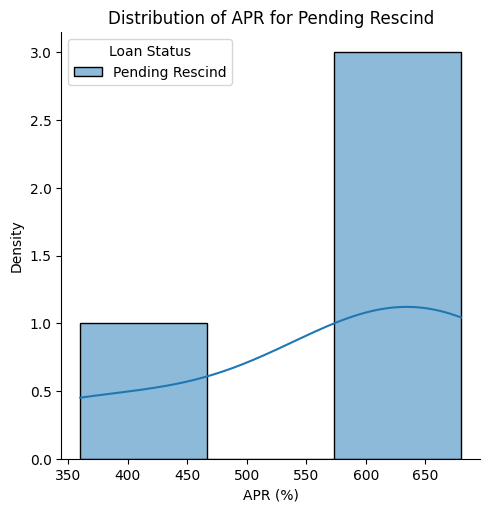

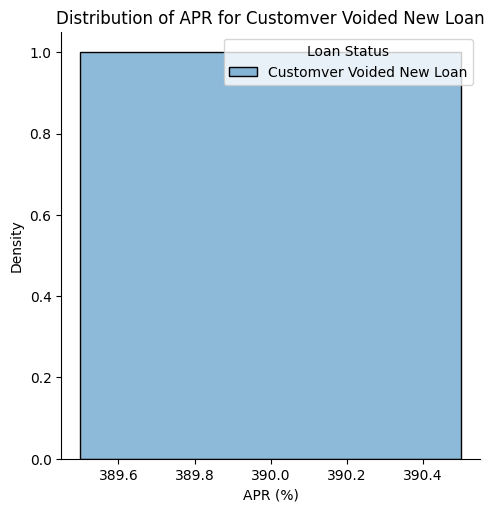

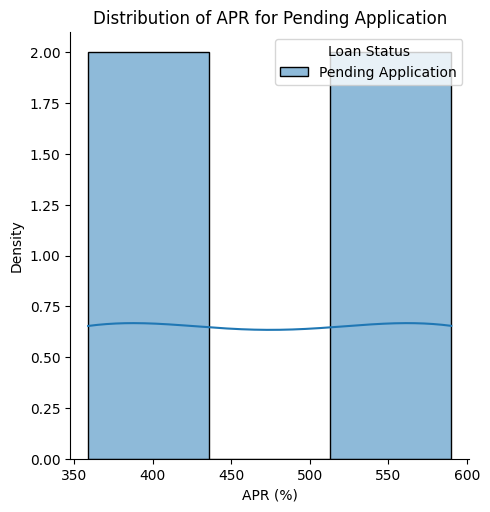

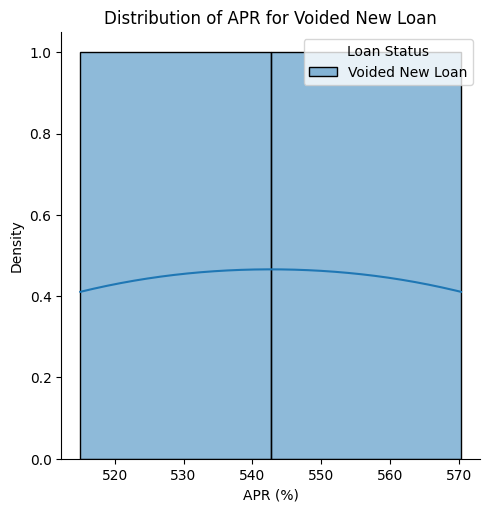

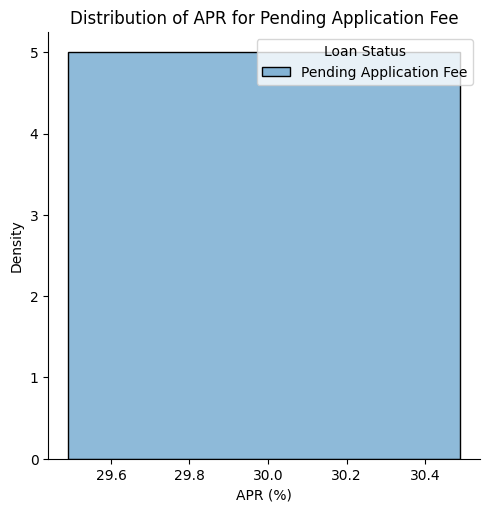

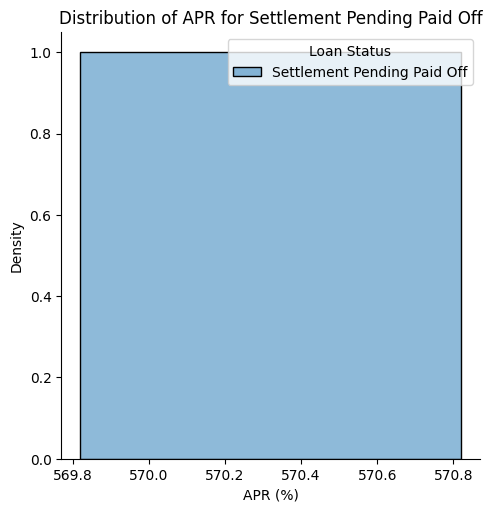

In [78]:

loan_status_outcomes = loan_df['loanStatus'].unique()

for status in loan_status_outcomes:
    subset = loan_df[loan_df['loanStatus'] == status]['apr']

    sns.displot(subset, label=str(status), kde=True)
    plt.title(f'Distribution of APR for {status}')
    plt.xlabel('APR (%)')
    plt.ylabel('Density')
    plt.legend(title='Loan Status')
    plt.show()
    plt.close()

There are several plots for each unique loanStatus present in the loan_df. Every plot will show the distribution of annual percentage rates (APRs) for loans associated with a specific loan status. An estimate of the distribution shape that is smooth is given by the blue line. The most typical APR levels at which loans are repaid are indicated by peaks in the KDE line. There may be various APR "hotspots" in each loan status, based on the multiple peaks in the distribution. This can indicate that borrowers are more likely to repay loans with a given annual percentage rate (APR) or it might represent how the loans are priced.

Analysis 1: `apr` vs. repayment rate within different loan amount quartiles.

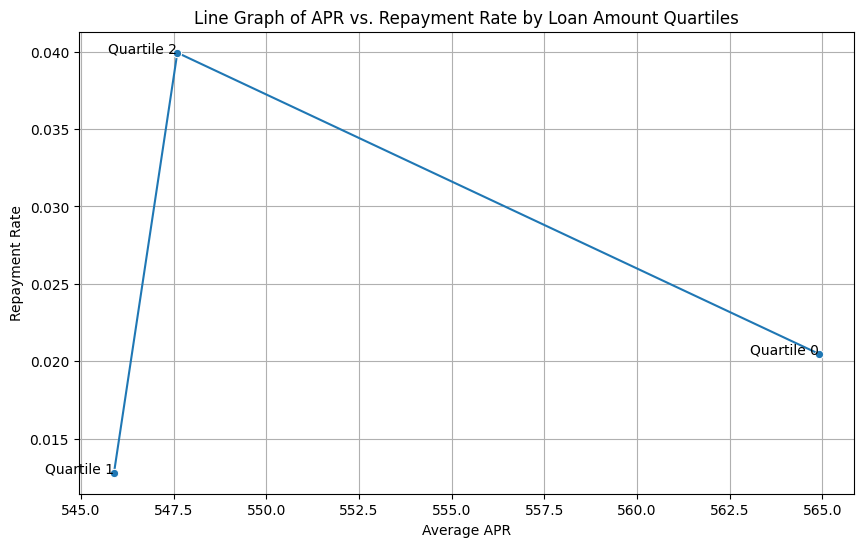

In [79]:
repaid_statuses = ['Paid Off Loan', 'Settlement Paid Off']
loan_df['loanRepaidStatus'] = loan_df['loanStatus'].apply(lambda x: 1 if x in repaid_statuses else 0)

loan_df['loanAmountQuartile'] = pd.qcut(loan_df['loanAmount'], 4, labels=False, duplicates='drop')
repayment_rate_by_quartile = loan_df.groupby('loanAmountQuartile')['loanRepaidStatus'].mean().reset_index()
average_apr_by_quartile = loan_df.groupby('loanAmountQuartile')['apr'].mean().reset_index()

combined_df = pd.merge(repayment_rate_by_quartile, average_apr_by_quartile, on='loanAmountQuartile')

plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='apr', y='loanRepaidStatus', marker='o')
plt.title('Line Graph of APR vs. Repayment Rate by Loan Amount Quartiles')
plt.xlabel('Average APR')
plt.ylabel('Repayment Rate')

for quartile, row in combined_df.iterrows():
    plt.text(row['apr'], row['loanRepaidStatus'], f"Quartile {int(row['loanAmountQuartile'])}", ha='right')

plt.grid(True)
plt.show()


The loan amounts are divided into four equal sections depending on their distribution when the data is split into quartiles. The average APR, which appears excessive for regular loans, is displayed on the x-axis. This may indicate that the loan is high-risk or has a short term, in which case the APR is likely to be higher.The repayment rate, or the percentage of loans that have been fully repaid within each APR quartile, is represented by the y-axis.As the average annual percentage rate rises, the payback rate falls, according to the downward-sloping tendency. This could suggest that there is a negative correlation between interest rates and loan repayment chances.

Conclusion of Main Question 1: 

The information indicates that the characteristics of the applicants, such as how frequently they are paid and which state they live in—have a significant impact on how they repay their loans. The reliability of previous loan performance is a powerful indicator of future repayment, and high annual percentage rates (APRs) are negatively correlated with repayment rates, especially for bigger loan amounts.
More efficient lending practices could result from modifying repayment plans to correspond with borrowers' income patterns, concentrating on regional creditworthiness trends, and taking the influence of annual percentage rate (APR) on repayment into account. Furthermore, we should add a more sophisticated comprehension of the financial behaviour of borrowers to enhance risk assessment models and possibly result in better results for lenders and borrowers.

Main Question 2: How do payment behaviors impact loan risk assessment?

Sub-question 2.1: Correlation between payment timeliness and loan repayment

Analysis 1: Plot the distribution of payment delays for repaid vs. defaulted loans.

<Figure size 1000x600 with 0 Axes>

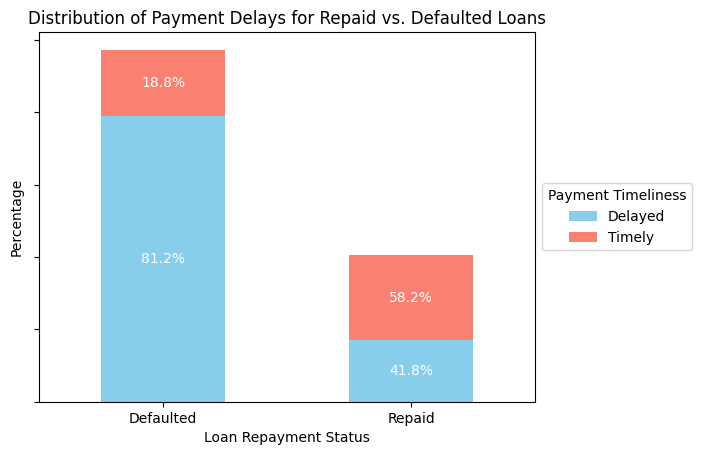

In [80]:
warnings.simplefilter(action='ignore', category=FutureWarning)
loan_payment_df = pd.merge(loan_df, payment_df, on='loanId', how='inner')

loan_payment_df['Timely_Payment'] = loan_payment_df['paymentStatus'] == 'Checked'
loan_payment_df['Timely_Payment'] = loan_payment_df['Timely_Payment'].astype('category')
loan_payment_df['Timely_Payment'] = loan_payment_df['Timely_Payment'].cat.rename_categories({True: 'Timely', False: 'Delayed'})

loan_payment_subset = loan_payment_df[['loanRepaidStatus', 'Timely_Payment']]
grouped_data = loan_payment_subset.groupby(['loanRepaidStatus', 'Timely_Payment']).size().unstack()

plt.figure(figsize=(10, 6))
colors = ['skyblue', 'salmon']
ax = grouped_data.plot(kind='bar', stacked=True, color=colors)
plt.title('Distribution of Payment Delays for Repaid vs. Defaulted Loans')
plt.xlabel('Loan Repayment Status')
plt.ylabel('Percentage')

for i, (idx, row) in enumerate(grouped_data.iterrows()):
    total = row.sum()
    previous_height = 0
    for j, value in enumerate(row):
        percentage = round(value / total * 100, 1)
        ax.annotate(f'{percentage}%', (i, previous_height + value / 2), ha='center', va='center', fontsize=10, color='white')
        previous_height += value

plt.xticks(ticks=[0, 1], labels=['Defaulted', 'Repaid'], rotation=0)
plt.legend(title='Payment Timeliness', loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().set_yticklabels([])
plt.show()



The "Defaulted" and "Repaid" loan categories are represented by the two main bars in the the graph. The percentages of "Timely" and "Delayed" payments are displayed in two parts on each bar.Loans shown as "Repaid" have been successfully repaid, whilst loans marked as "Defaulted" have not been returned in accordance with the terms. Only a small percentage (18.8%) of defaulting loans had timely payment, a greater percentage (81.2%) had delayed payments.Of loans that were repaid, 58.2% of borrowers made their payments on time, whereas 41.8% had late payments.According to the research, timely payments are positively correlated with successfully repaying a loan, whereas loans that is default are more likely to have payment delays.

Analysis 2: Line chart tracking cumulative payment amounts over time.

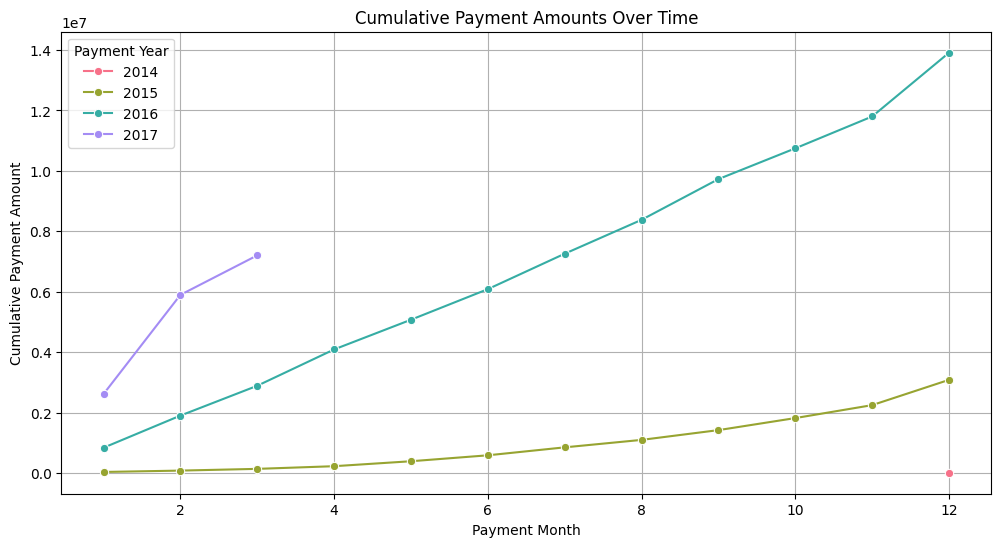

In [81]:
loan_payment_df = pd.merge(loan_df, payment_df, on='loanId', how='inner')
loan_payment_df['Timely_Payment'] = loan_payment_df['paymentStatus'] == 'Checked'

loan_payment_df['paymentMonth'] = loan_payment_df['paymentDate'].dt.month
loan_payment_df['paymentYear'] = loan_payment_df['paymentDate'].dt.year

timely_payments_df = loan_payment_df[loan_payment_df['Timely_Payment']]

grouped_data = timely_payments_df.groupby(['paymentYear', 'paymentMonth'])['paymentAmount'].sum().groupby(level=0).cumsum().reset_index()

custom_palette = sns.color_palette("husl", len(grouped_data['paymentYear'].unique()))

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='paymentMonth', y='paymentAmount', hue='paymentYear', marker='o', palette=custom_palette)
plt.title('Cumulative Payment Amounts Over Time')
plt.xlabel('Payment Month')
plt.ylabel('Cumulative Payment Amount')
plt.legend(title='Payment Year', loc='upper left')
plt.grid(True)
plt.show()



Each line on the graph represents a separate year and shows the total amount of payments paid throughout time. The payment month (from 1 to 12) is displayed on the x-axis, and the total amount of payments is shown on the y-axis.As the months go by, each line displays a pattern where the total amount paid rises, as would be expected as more payments are made during the year.In comparison to prior years, the 2017 line displays the greatest cumulative payments, which could be attributed to either a higher total number of loans, higher individual payment amounts, or a mix of both.The cumulative payments show a discernible increase from 2015 to 2016, indicating a substantial increase in loan repayments during this time. Over time, there is a consistent increase in payments, which could be brought on the expansion of the loan programme.

Analysis 3: PaymentAmount vs. OriginallyScheduledPaymentAmount.

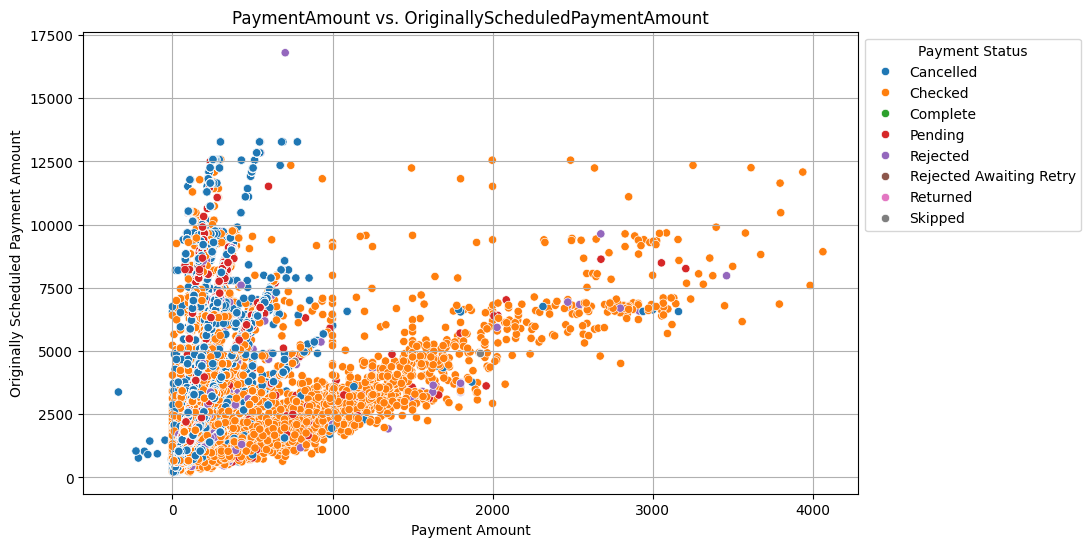

In [82]:
loan_payment_df = pd.merge(loan_df, payment_df, on='loanId', how='inner')
loan_payment_df['Timely_Payment'] = loan_payment_df['paymentStatus'] == 'Checked'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_payment_df, x='paymentAmount', y='originallyScheduledPaymentAmount', hue='paymentStatus')
plt.title('PaymentAmount vs. OriginallyScheduledPaymentAmount')
plt.xlabel('Payment Amount')
plt.ylabel('Originally Scheduled Payment Amount')
plt.legend(title='Payment Status', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



A good repayment pattern is indicated by payments that fall on the 45-degree line, which is the point where the x and y values are equal. These payments are likely to be made on time and in full. Offline points may indicate problems with the payment procedure, the borrowers' financial hardship, or administrative faults.

Sub-question 2.2: Role of collection interventions in successful loan repayment

Data Exploration: Summarize the number of payments made under collection plans vs. regular plans.

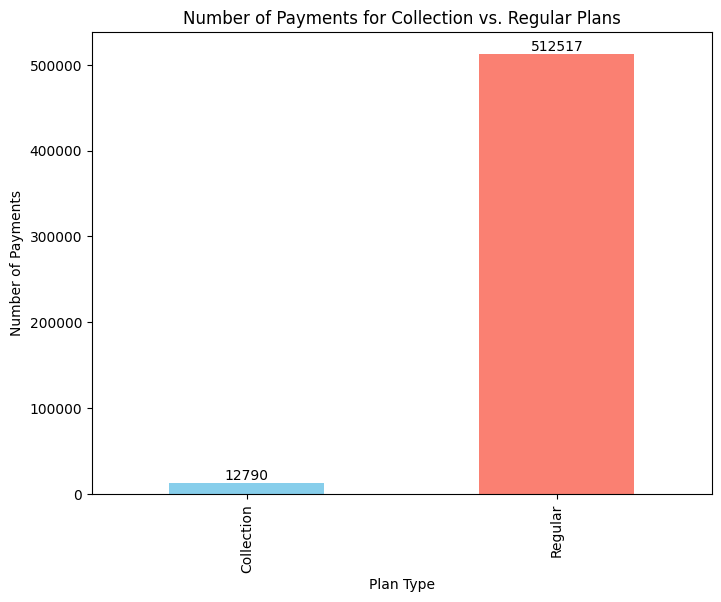

In [83]:
temp_payment_df = payment_df.copy()
temp_payment_df['Plan_Type'] = temp_payment_df['isCollection'].apply(lambda x: 'Collection' if x else 'Regular')
payment_summary = temp_payment_df.groupby('Plan_Type')['paymentStatus'].count()

plt.figure(figsize=(8, 6))
payment_summary.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Payments for Collection vs. Regular Plans')
plt.xlabel('Plan Type')
plt.ylabel('Number of Payments')

for i, count in enumerate(payment_summary):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()


'Regular' payments are significantly greater than 'Collection' payments, indicating a great difference in payment frequency between the two plan categories.This implies that rather than being the outcome of collection efforts, the majority of the payments are being made as part of regular payment schedules.

Analysis 1: Compare the frequency of collection actions between successfully repaid and defaulted loans.

<Figure size 1000x600 with 0 Axes>

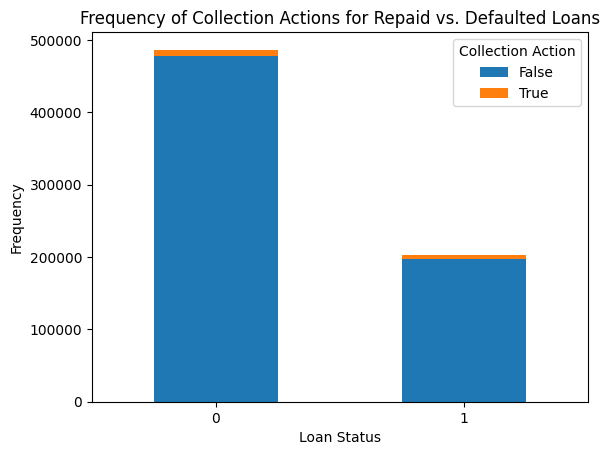

In [84]:
loan_payment_df = pd.merge(loan_df, payment_df, on='loanId', how='inner')

grouped_data = loan_payment_df.groupby(['loanRepaidStatus', 'isCollection']).size().unstack()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Frequency of Collection Actions for Repaid vs. Defaulted Loans')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Collection Action')
plt.show()


The high "True" portion within the defaulted bar indicates that a great number of defaulted loans have had collection actions brought against them. Repaid debts, on the other hand, appear to have fewer collection operations because the "True" area of the repaid bar is significantly smaller. 

Analysis 2: Analyze the proportion of loans entering collections that get repaid.

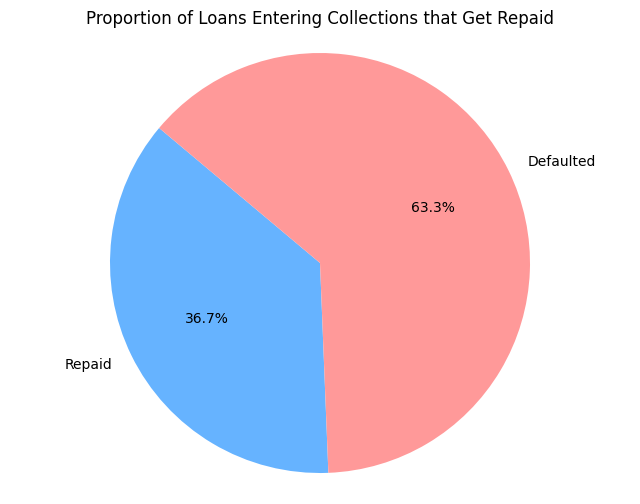

In [85]:
warnings.simplefilter(action='ignore', category=FutureWarning)
loan_payment_df = pd.merge(loan_df, payment_df, on='loanId', how='inner')
collection_loans = loan_payment_df[loan_payment_df['isCollection']]

total_collection_loans = len(collection_loans)

repaid_collection_loans = len(collection_loans[collection_loans['loanStatus'].isin(['Paid Off Loan', 'Settlement Paid Off'])])

proportion_repaid = repaid_collection_loans / total_collection_loans

labels = ['Repaid', 'Defaulted']
sizes = [repaid_collection_loans, total_collection_loans - repaid_collection_loans]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Loans Entering Collections that Get Repaid')
plt.axis('equal')
plt.show()


The blue area on the chart, which represents returned loans, makes up about 36.7% of the total area. Defaulted loans are represented by the red section on the chart, which makes up the remaining 63.3%. According to this graphic, a great percentage of loans that go into collections are not repaid. The financial institution may find this information to be crucial because it shows the risk involved in the loans and the efficiency of the collection procedure.

Analysis 3: Proportion of Loans Entering Collections by APR Range

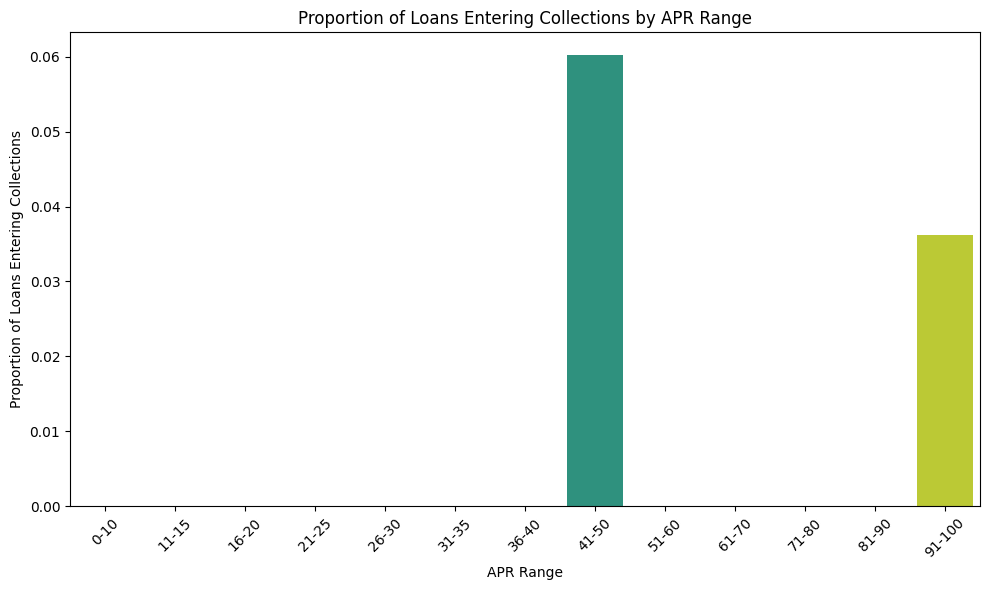

In [86]:
loan_payment_df = pd.merge(loan_df, payment_df, on='loanId', how='inner')

apr_bins = [0, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100]
apr_labels = ['0-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
loan_payment_df['apr_range'] = pd.cut(loan_payment_df['apr'], bins=apr_bins, labels=apr_labels)

collection_loans = loan_payment_df[loan_payment_df['isCollection']]

proportion_by_apr = collection_loans.groupby('apr_range').size() / loan_payment_df.groupby('apr_range').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=proportion_by_apr.index, y=proportion_by_apr.values, palette='viridis')
plt.title('Proportion of Loans Entering Collections by APR Range')
plt.xlabel('APR Range')
plt.ylabel('Proportion of Loans Entering Collections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The plot shows that loans with lower interest rates have a lesser chance of going into collections because very few loans with APRs in the lower categories (0–10% to 25–30%) go into collections. Loans in the 41–50% APR range show a notable rise, suggesting that a higher percentage of these loans go into collections than loans in other APR areas.

Conclusion of Main Question 2:

A significant predictor of loan risk is payment behaviour, with timely payments having a high relationship with successful loan payback. Frequent payment patterns indicate a lower risk, but defaults and delays generally enter collection, which are less successful in collecting loan. Higher interest rates are also be associated with more financial burden on borrowers, which would increase the risk profile of such loans. Additionally, loans with higher APRs has a higher probability to enter collections. This emphasises the requirement for risk assessment and collecting methods tailored to a given location. 

Main Question 3: What insights can be drawn from Clarity underwriting variables?

Sub-question 3.1: Predictive power of clear fraud indicators on loan repayment

Data Exploration: Investigate the range and distribution of `clearfraudscore` across the dataset.

count    49615.000000
mean       683.769787
std        126.205372
min        122.000000
25%        592.000000
50%        691.000000
75%        783.000000
max        965.000000
Name: clearfraudscore, dtype: float64


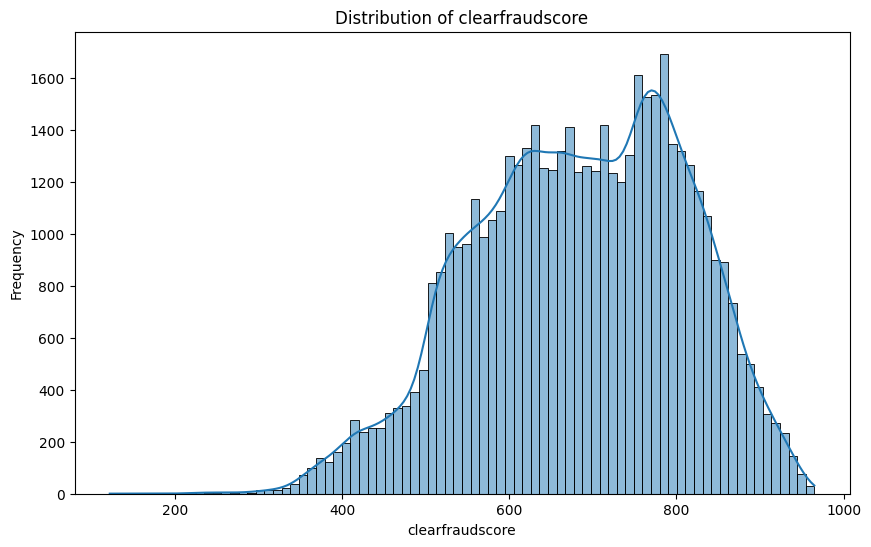

In [87]:
print(clarity_underwriting_df['clearfraudscore'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(clarity_underwriting_df['clearfraudscore'], kde=True)
plt.title('Distribution of clearfraudscore')
plt.xlabel('clearfraudscore')
plt.ylabel('Frequency')
plt.show()

With fewer scores at the extreme low and high ends, the distribution seems to be generally bell-shaped, indicating that most scores are concentrated around a centre range. The frequency of scores has a noticeable peak in the centre of the range, which may indicate that most loans or transactions have a moderate risk of fraud.

Analysis 1: Count and compare the number of clear fraud indicators present.

<Figure size 1000x600 with 0 Axes>

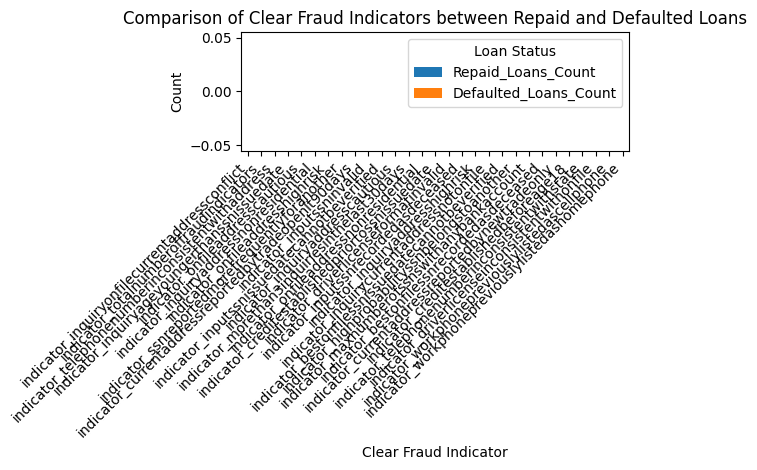

In [88]:
loan_underwriting_df = loan_df.merge(clarity_underwriting_df, left_on='clarityFraudId', right_on='underwritingid', how='left')
indicator_columns = [col for col in loan_underwriting_df.columns if col.startswith('indicator_')]

repaid_indicator_counts = loan_underwriting_df[loan_underwriting_df['loanStatus'] == 'Repaid'][indicator_columns].sum()

defaulted_indicator_counts = loan_underwriting_df[loan_underwriting_df['loanStatus'] == 'Defaulted'][indicator_columns].sum()

indicator_comparison_df = pd.DataFrame({
    'Indicator': repaid_indicator_counts.index,
    'Repaid_Loans_Count': repaid_indicator_counts.values,
    'Defaulted_Loans_Count': defaulted_indicator_counts.values
})


indicator_comparison_df.set_index('Indicator', inplace=True)

plt.figure(figsize=(10, 6))
indicator_comparison_df.plot(kind='bar', stacked=False)
plt.title('Comparison of Clear Fraud Indicators between Repaid and Defaulted Loans')
plt.xlabel('Clear Fraud Indicator')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

Indicator_macnumberofssnswithanybank account is one of the indicators where the count of defaulted loans is much higher than the count of repaid loans. This would be predicted if the indicators are useful in predicting default due to fraud.

Analysis 2: Mean Clear Fraud Score by Inquiry Time

['inquiry_1m', 'inquiry_10m', 'inquiry_1h', 'inquiry_24h', 'inquiry_7d', 'inquiry_15d', 'inquiry_30d', 'inquiry_90d', 'inquiry_365d']


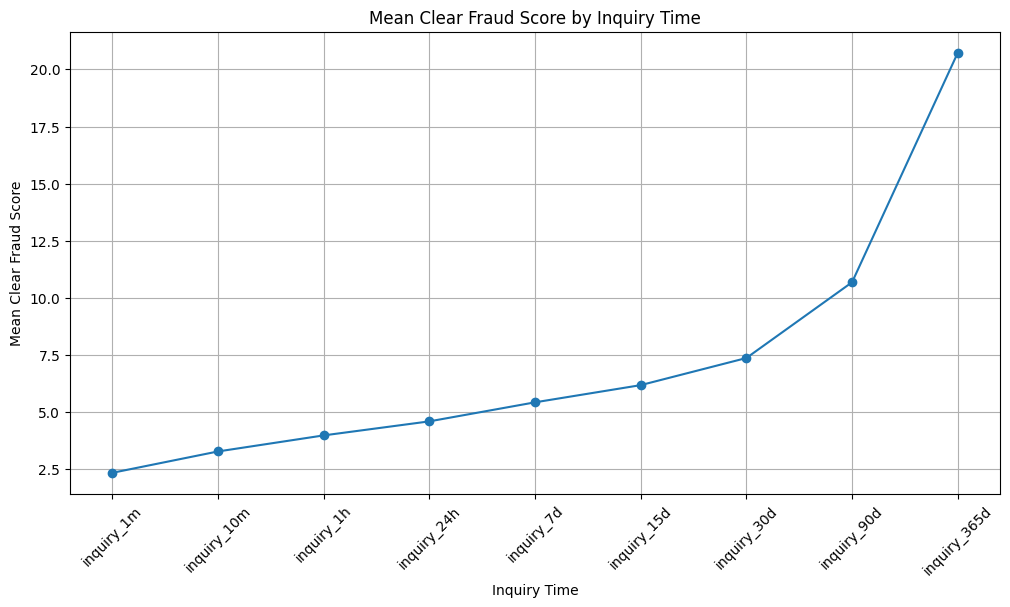

In [89]:
loan_underwriting_df = loan_df.merge(clarity_underwriting_df, left_on='clarityFraudId', right_on='underwritingid', how='left')

indicator_columns = [col for col in loan_underwriting_df.columns if col.startswith('inquiry_')]

inquiry_time_order = {
    '1m': 1,
    '10m': 2,
    '1h': 3,
    '24h': 4,
    '7d': 5,
    '15d': 6,
    '30d': 7,
    '90d': 8,
    '365d': 9
}

indicator_columns_sorted = sorted(
    indicator_columns,
    key=lambda x: inquiry_time_order.get(x.split('_')[1], 10)  
)
print(indicator_columns_sorted)

mean_clearfraudscore_by_inquiry = {}

for column in indicator_columns_sorted:
    mean_clearfraudscore_by_inquiry[column] = loan_underwriting_df[column].mean()

mean_scores_series = pd.Series(mean_clearfraudscore_by_inquiry)

plt.figure(figsize=(12, 6))
plt.plot(mean_scores_series.index, mean_scores_series.values, marker='o', linestyle='-')
plt.title('Mean Clear Fraud Score by Inquiry Time')
plt.xlabel('Inquiry Time')
plt.ylabel('Mean Clear Fraud Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Different time periods, ranging from one month to 365 days, are represented by this axis. These time periods probably indicate how recently inquiry related to the analysis's subjects have been asked. As the time range is extended, the graphic indicates a general rising trend in the mean clear fraud score. According to this pattern, the average clear fraud score rises with the length of time inquiries are taken into consideration.

Analysis 3: Plot the number of fraud indicators by loan status, faceted by `payFrequency` to assess risk patterns.

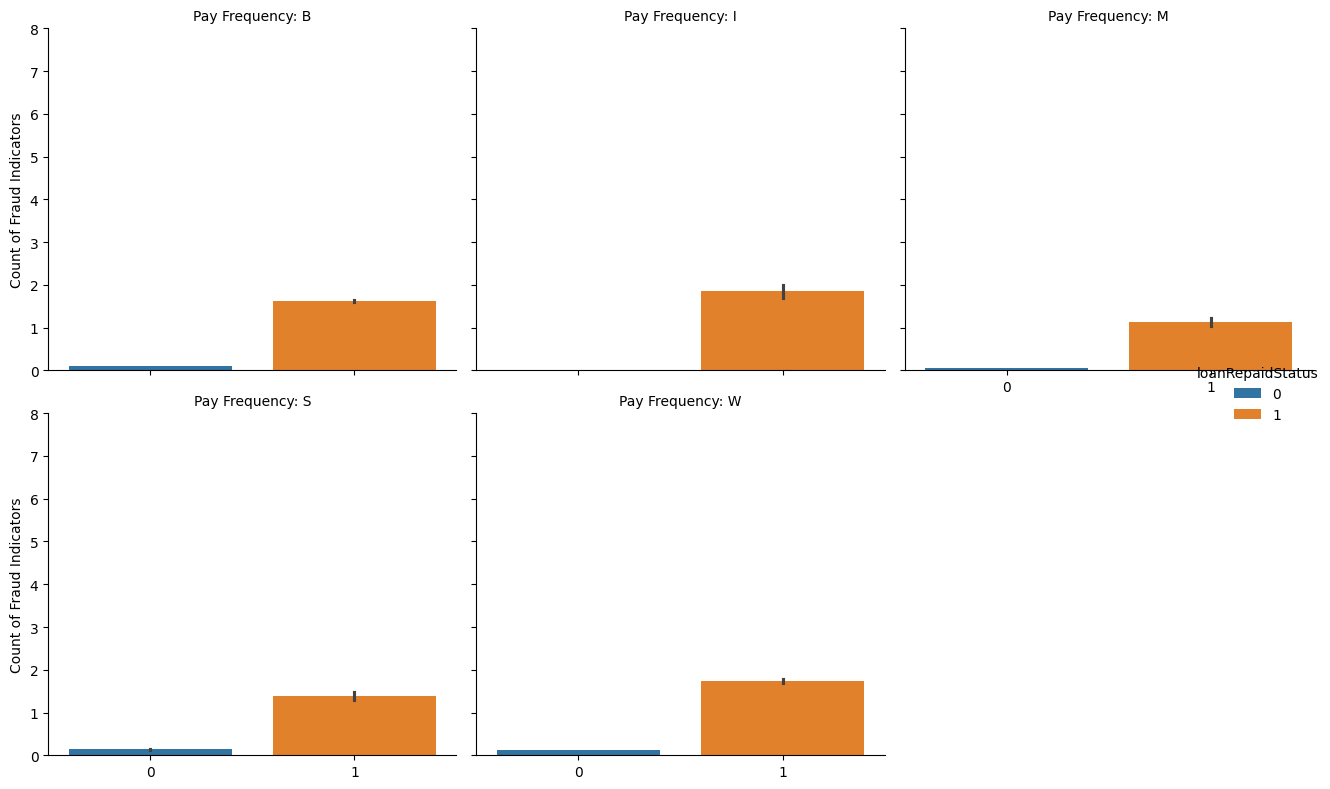

In [90]:
loan_underwriting_df = loan_df.merge(clarity_underwriting_df, left_on='clarityFraudId', right_on='underwritingid', how='left')

loan_underwriting_df['fraud_indicator_count'] = loan_underwriting_df.filter(regex='^indicator_totalnumberoffraudindicators').sum(axis=1)

g = sns.catplot(
    x='loanRepaidStatus', 
    y='fraud_indicator_count', 
    col='payFrequency', 
    hue='loanRepaidStatus', 
    data=loan_underwriting_df, 
    kind='bar',
    col_wrap=3,
    height=4,
    aspect=1
)

g.set_titles("Pay Frequency: {col_name}")
g.set_axis_labels("", "Count of Fraud Indicators")  
g.set(ylim=(0, loan_underwriting_df['fraud_indicator_count'].max()))

plt.tight_layout()
plt.show()


Loans that have fallen behind on all payment frequencies have a tendency to have a greater number of fraud signs. This shows that the probability of a loan defaulting may be correlated with the existence of fraud indications. 

Sub-question 3.2: The relationship between identity verification outcomes and loan risk

Data Exploration: Examine the frequency of different `identityverification` outcomes and their association with loan repayment.

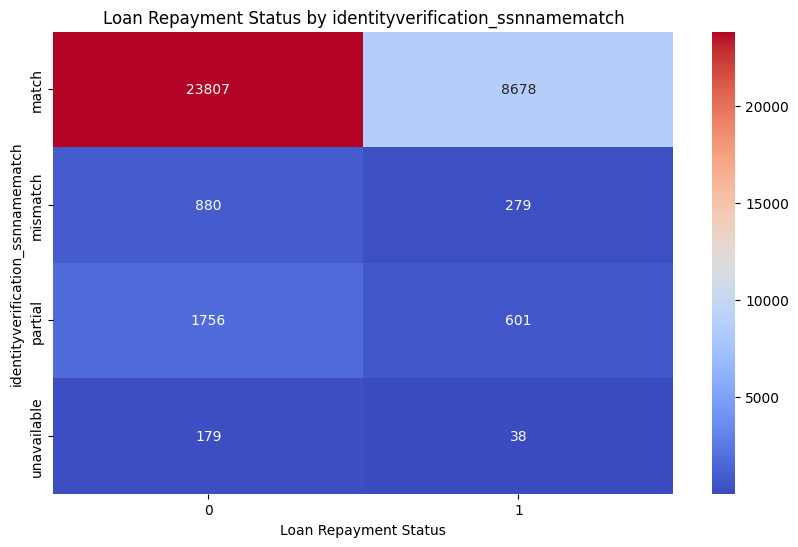

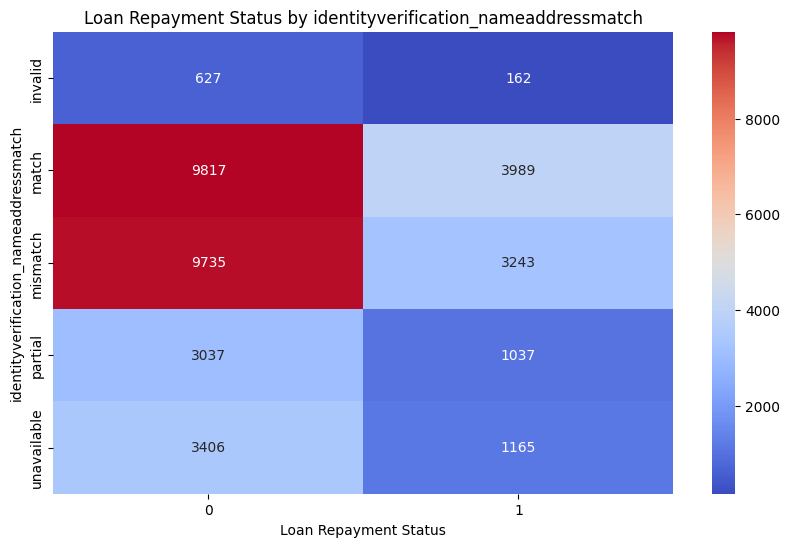

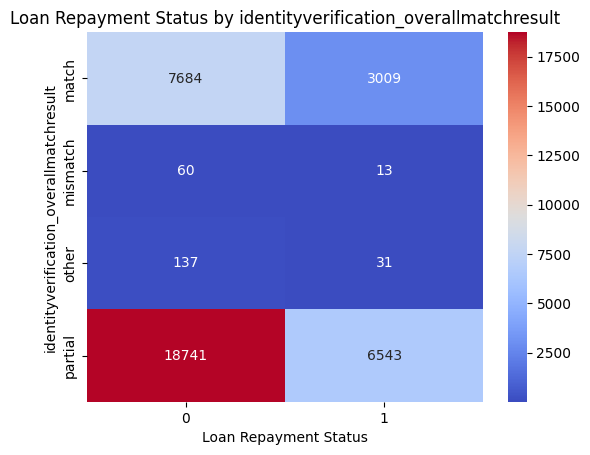

In [91]:
loan_underwriting_df = loan_df.merge(clarity_underwriting_df, left_on='clarityFraudId', right_on='underwritingid', how='left')

identity_verification_outcomes = {}


for col in identityverification_columns:
    crosstab = pd.crosstab(loan_underwriting_df[col], loan_underwriting_df['loanRepaidStatus'], margins=False)
    frequency = loan_underwriting_df[col].value_counts()
    identity_verification_outcomes[col] = {'crosstab': crosstab, 'frequency': frequency}

col_to_visualize = 'identityverification_ssnnamematch'
col_to_visualize2 = 'identityverification_nameaddressmatch'
col_to_visualize3 = 'identityverification_overallmatchresult'


plt.figure(figsize=(10, 6))
sns.heatmap(identity_verification_outcomes[col_to_visualize]['crosstab'], annot=True, fmt='d', cmap='coolwarm')
plt.title(f'Loan Repayment Status by {col_to_visualize}')
plt.xlabel('Loan Repayment Status')
plt.ylabel(col_to_visualize)
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(identity_verification_outcomes[col_to_visualize2]['crosstab'], annot=True, fmt='d', cmap='coolwarm')
plt.title(f'Loan Repayment Status by {col_to_visualize2}')
plt.xlabel('Loan Repayment Status')
plt.ylabel(col_to_visualize2)
plt.show()

sns.heatmap(identity_verification_outcomes[col_to_visualize3]['crosstab'], annot=True, fmt='d', cmap='coolwarm')
plt.title(f'Loan Repayment Status by {col_to_visualize3}')
plt.xlabel('Loan Repayment Status')
plt.ylabel(col_to_visualize3)
plt.show()


A heatmap based on Social Security Number (SSN) and name matching contrasts the loan repayment status (Repaid vs. Defaulted) across various identity verification check results. The heatmap's cells each reflect the number of loans in each category, and the intensity of each colour indicates the size of the count—higher counts are represented by deeper colours. In comparison to loans that are repaid (8,678), there are significantly more defaulted loans (23,807) for loans where the SSN and name check match. Both defaulted and repaid debts have a significantly lower figure (880 defaulted vs. 279 repaid) when the name redress match is taken into account. With 179 loans in default and 38 loans that have been redeemed, the 'unavailable' category has the lowest counts. This could be an indication of incomplete or ambiguous verification data. 

Analysis 1: Default rates by `identityverification` outcomes.

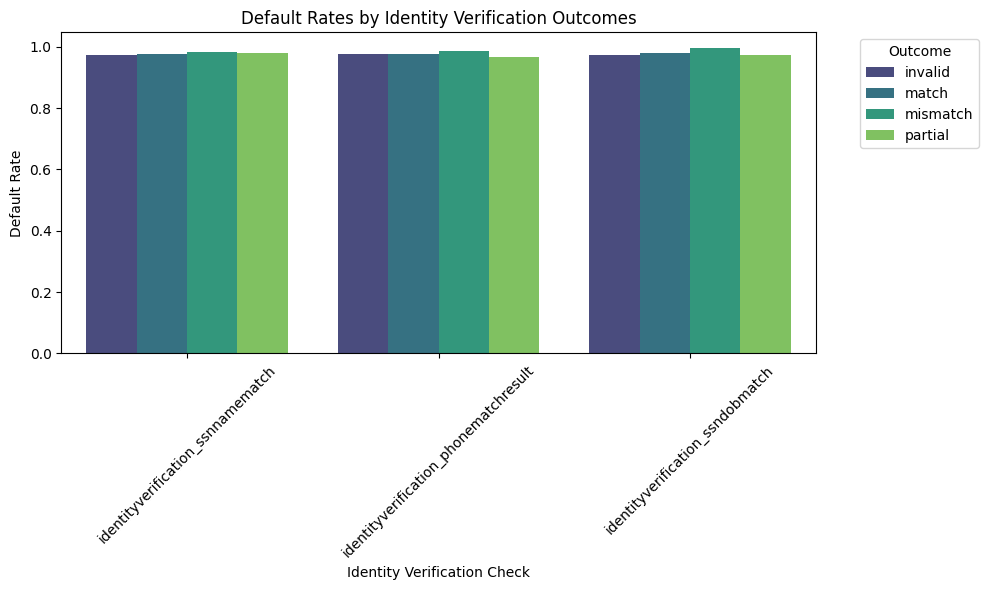

In [92]:
warnings.simplefilter(action='ignore', category=FutureWarning)
repaid_statuses = ['Paid Off Loan', 'Settlement Paid Off']
loan_df['loanRepaidStatus'] = loan_underwriting_df['loanStatus'].apply(lambda x: 'Repaid' if x in repaid_statuses else 'Defaulted')

loan_underwriting_df = loan_df.merge(clarity_underwriting_df, left_on='clarityFraudId', right_on='underwritingid', how='left')

cols_to_replace = ['identityverification_ssnnamematch', 'identityverification_phonematchresult', 'identityverification_ssndobmatch']
for col in cols_to_replace:
    loan_underwriting_df[col] = loan_underwriting_df[col].replace({'unavailable': 'invalid'})

default_rates = pd.DataFrame()

for col in cols_to_replace:
    status_crosstab = pd.crosstab(index=loan_underwriting_df[col], columns=loan_underwriting_df['loanRepaidStatus'], normalize='index')
    default_rate = status_crosstab['Defaulted']
    default_rates = pd.concat([default_rates, default_rate], axis=1)

default_rates.columns = cols_to_replace

default_rates_melted = default_rates.reset_index().melt(id_vars='index', var_name='Verification Check', value_name='Default Rate')

plt.figure(figsize=(10, 6))
sns.barplot(x='Verification Check', y='Default Rate', hue='index', data=default_rates_melted, palette='viridis')
plt.title('Default Rates by Identity Verification Outcomes')
plt.xlabel('Identity Verification Check')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This graph show various verification checks that were made with phone numbers, social security numbers, and a mix of social security numbers and birthdates. The default rates for the various outcomes varies slightly. Inconsistencies in verification may be a risk factor for default, as seen by the slightly higher default rate for "mismatch" outcomes compared to "match" outcomes.

Analysis 2: ANOVA to test differences in `clearfraudscore`.

In [93]:
loan_underwriting_df['clearfraudscore'] = pd.to_numeric(loan_underwriting_df['clearfraudscore'], errors='coerce')

anova_df = loan_underwriting_df.dropna(subset=['clearfraudscore', 'loanRepaidStatus'])

anova_result = stats.f_oneway(
    anova_df[anova_df['loanRepaidStatus'] == 'Repaid']['clearfraudscore'],
    anova_df[anova_df['loanRepaidStatus'] == 'Defaulted']['clearfraudscore']
)

print(f"ANOVA result: F={anova_result.statistic}, p={anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("The difference in clearfraudscore between Repaid and Defaulted loans is statistically significant.")
else:
    print("There is no statistically significant difference in clearfraudscore between Repaid and Defaulted loans.")

ANOVA result: F=0.4022518497183779, p=0.5259326008673724
There is no statistically significant difference in clearfraudscore between Repaid and Defaulted loans.


Sub-question 3.3: Impact of inquiry history depth on loan repayment

Analysis 1: Visualization of loan repayment rates by the number of inquiries.

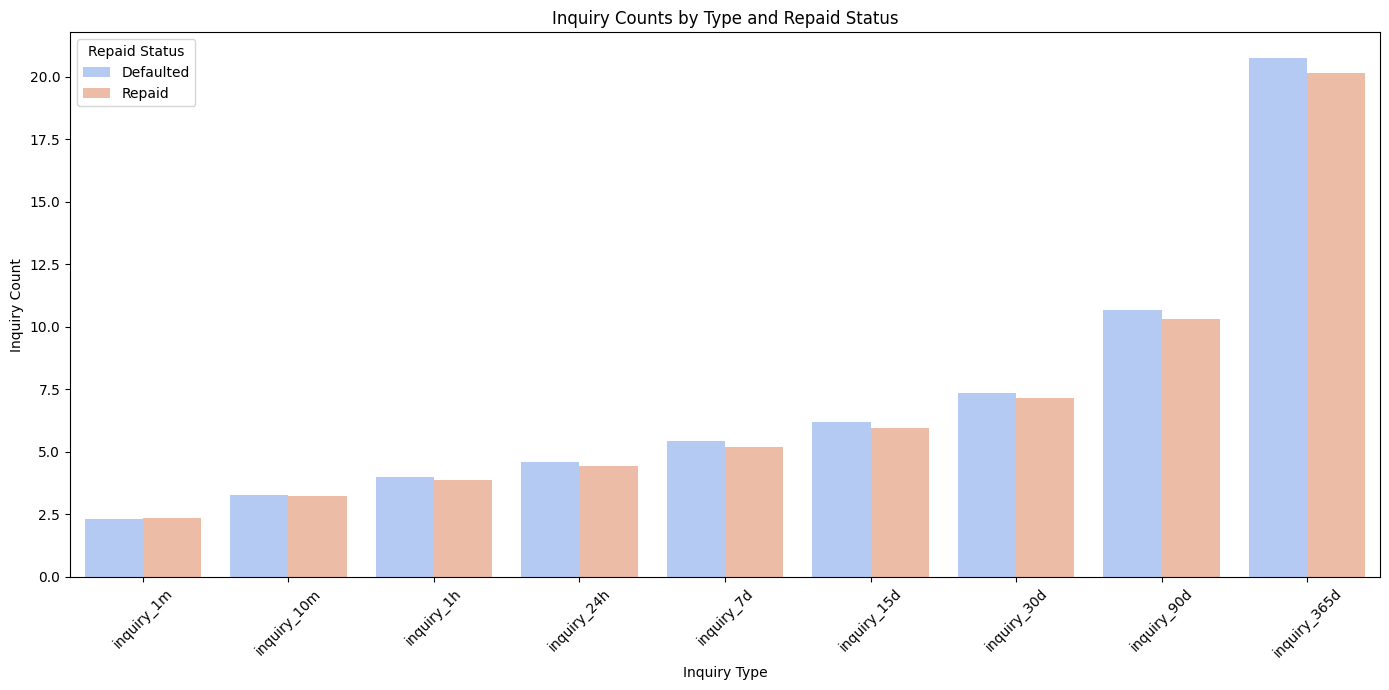

In [94]:
warnings.simplefilter(action='ignore', category=FutureWarning)
loan_underwriting_df = loan_df.merge(clarity_underwriting_df, left_on='clarityFraudId', right_on='underwritingid', how='left')

indicator_columns = [col for col in loan_underwriting_df.columns if col.startswith('inquiry_')]

inquiry_time_order = {
    '1m': 1,
    '10m': 2,
    '1h': 3,
    '24h': 4,
    '7d': 5,
    '15d': 6,
    '30d': 7,
    '90d': 8,
    '365d': 9
}

indicator_columns_sorted = sorted(
    indicator_columns,
    key=lambda x: inquiry_time_order.get(x.split('_')[1], 10)
)


melted_df = loan_underwriting_df.melt(id_vars=['loanRepaidStatus'], value_vars=indicator_columns_sorted, var_name='InquiryType', value_name='InquiryCount')

plt.figure(figsize=(14, 7))
sns.barplot(x='InquiryType', y='InquiryCount', hue='loanRepaidStatus', data=melted_df, palette='coolwarm', ci=None)
plt.title('Inquiry Counts by Type and Repaid Status')
plt.xlabel('Inquiry Type')
plt.ylabel('Inquiry Count')
plt.xticks(rotation=45)
plt.legend(title='Repaid Status')
plt.tight_layout()
plt.show()

"Inquiry Counts by Type and Loan Status" are visualised as a bar chart that contrasts the amount of inquiries made for loans that were either repaid or defaulted, broken down by different time-based categories of inquiries.The number of loan default inquiries is higher than the number of loan repayment inquiries in periods longer than ninety days. This could suggest that a larger chance of default could be linked to a higher frequency of queries. The difference between repaid and defaulted loans is less noticeable for the shortest time frames (inquiry_1m and inquiry_3m), which may suggest that short-term inquiries are not as predictive as others.

Analysis 2: Regression analysis exploring the effect of inquiry counts.

Optimization terminated successfully.
         Current function value: 0.084944
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             loanStatus   No. Observations:               577426
Model:                          Logit   Df Residuals:                   577424
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Feb 2024   Pseudo R-squ.:                  0.1669
Time:                        12:43:07   Log-Likelihood:                -49049.
converged:                       True   LL-Null:                       -58878.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.2915      0.011   -378.644      0.000      -4.314      -4.269
to

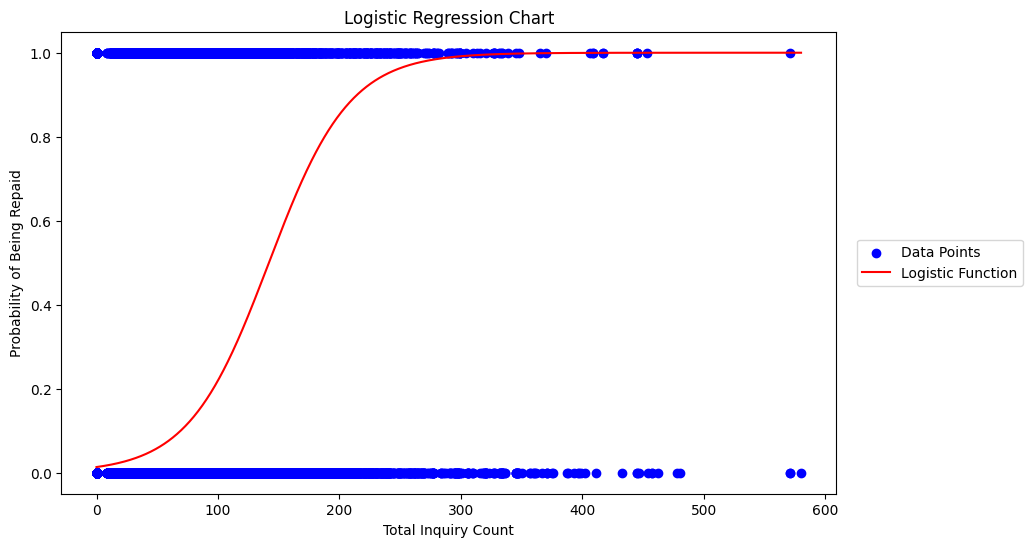

In [95]:

loan_underwriting_df = loan_df.merge(clarity_underwriting_df, left_on='clarityFraudId', right_on='underwritingid', how='left')
indicator_columns = [col for col in loan_underwriting_df.columns if col.startswith('inquiry_')]

inquiry_time_order = {
    '1m': 1,
    '10m': 2,
    '1h': 3,
    '24h': 4,
    '7d': 5,
    '15d': 6,
    '30d': 7,
    '90d': 8,
    '365d': 9
}

indicator_columns_sorted = sorted(
    indicator_columns,
    key=lambda x: inquiry_time_order.get(x.split('_')[1], 10)  
)

repaid_statuses = ['Paid Off Loan', 'Settlement Paid Off']
loan_underwriting_df['loanStatus'] = loan_underwriting_df['loanStatus'].apply(lambda x: 'Repaid' if x in repaid_statuses else 'Defaulted')

loan_underwriting_df['total_inquiry_count'] = loan_underwriting_df[indicator_columns_sorted].sum(axis=1)

X = loan_underwriting_df[['total_inquiry_count']] 
y = loan_underwriting_df['loanStatus'] 

y_binary = y.apply(lambda x: 1 if x == 'Repaid' else 0)

X = sm.add_constant(X)

model = sm.Logit(y_binary, X)

result = model.fit()

print(result.summary())

plt.figure(figsize=(10, 6))
plt.scatter(X['total_inquiry_count'], y_binary, color='blue', label='Data Points')

x_values = np.linspace(X['total_inquiry_count'].min(), X['total_inquiry_count'].max(), 1000)
const = result.params['const']
coef = result.params['total_inquiry_count']
logistic_func = lambda x: 1 / (1 + np.exp(-(const + coef * x)))
plt.plot(x_values, logistic_func(x_values), color='red', label='Logistic Function')

plt.title('Logistic Regression Chart')
plt.xlabel('Total Inquiry Count')
plt.ylabel('Probability of Being Repaid')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

plt.show()

Every point represents the total number of loan inquiries as well as the resultant status of the loan—whether it was repaid (1) or defaulted (0). Given that the data points are grouped at a probability of 1.0, it appears that the majority of loans are repaid. The projected likelihood of a loan being repaid given the total number of inquiries is displayed on this curve. The declining trend suggests that the likelihood of the loan being repaid falls as the total number of inquiries rises. This implies that there may be a correlation between a higher number of inquiries and a higher chance of loan default. The likelihood of loan payback is negatively correlated with the quantity of inquiries. This could imply that a larger likelihood of default is associated with financial stress, which could be indicated by borrowers making more inquiries.

Sub-question 3.4: Role of Clarity fraud score in predicting loan outcome

Analysis 1: Analyze the `clearfraudscore` distribution in the context of `loanStatus`. context of `loanStatus`.

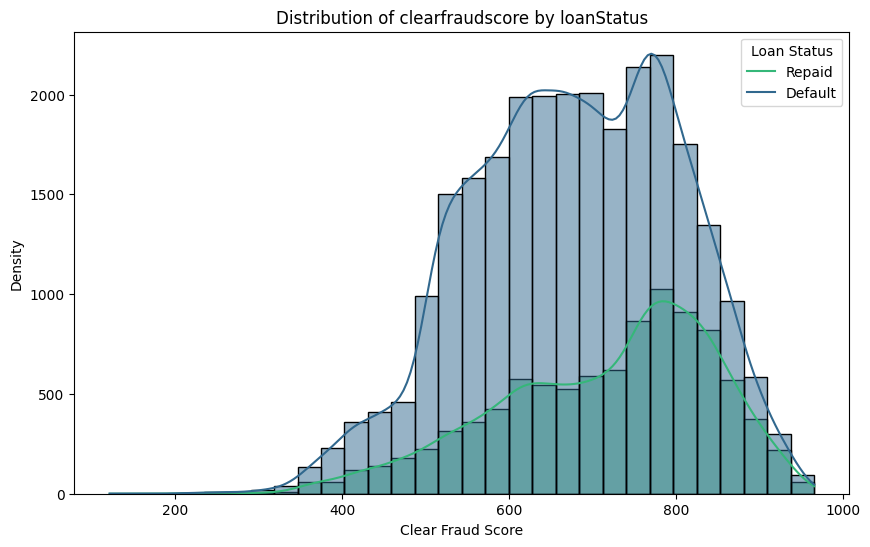

In [96]:
plt.figure(figsize=(10, 6))
sns.histplot(data=loan_underwriting_df, x='clearfraudscore', hue='loanStatus', kde=True, bins=30, palette='viridis')
plt.title('Distribution of clearfraudscore by loanStatus')
plt.xlabel('Clear Fraud Score')
plt.ylabel('Density')
plt.legend(title='Loan Status', labels=['Repaid', 'Default'])  # Setting legend title and labels
plt.show()

The distribution of obvious fraud scores for repaid and defaulted loans is compared in the histogram.  Since loans with very high fraud scores are more likely to default, the tail of the distribution towards the higher fraud scores (800–1000) is more noticeable for defaulted loans than for repaid loans.

Analysis 2: Decision tree analysis using `clearfraudscore`.

Accuracy: 0.9790970334066467
              precision    recall  f1-score   support

   Defaulted       0.98      1.00      0.99    113072
      Repaid       1.00      0.00      0.00      2414

    accuracy                           0.98    115486
   macro avg       0.99      0.50      0.49    115486
weighted avg       0.98      0.98      0.97    115486



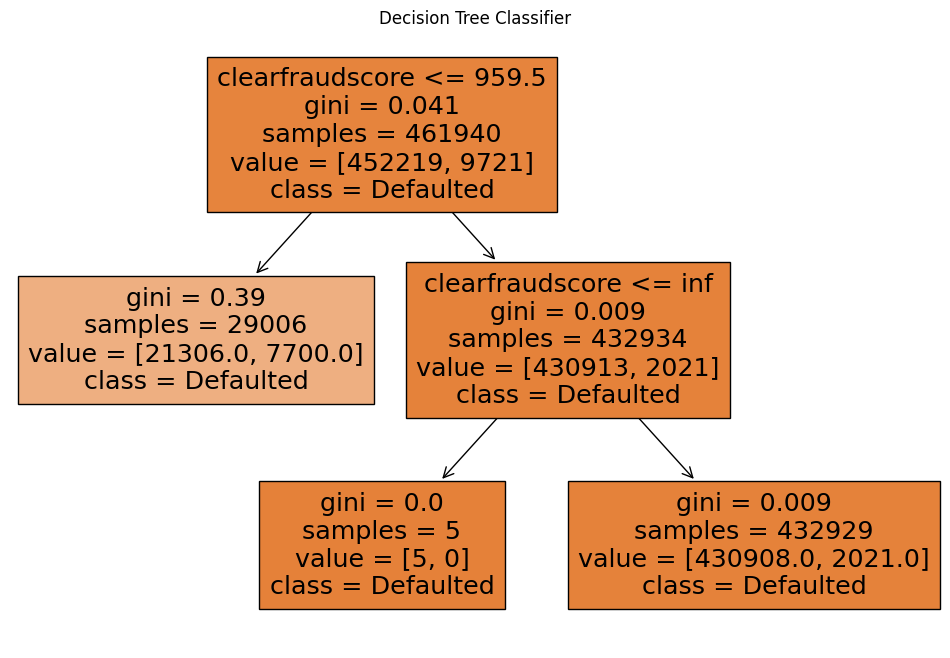

In [97]:
X = loan_underwriting_df[['clearfraudscore']]
y = loan_underwriting_df['loanStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['clearfraudscore'], class_names=['Defaulted', 'Repaid'])
plt.title('Decision Tree Classifier')
plt.show()

Based on the clear fraud score, the decision tree attempts to predict whether a loan would fail. Depending on whether the clear fraud score is less than or equal to 959.5, the tree divides the data into nodes. As can be seen in the right child node, the tree indicates that lower clear fraud ratings are linked to a better chance of loan repayment (non-default). There is a higher percentage of defaulted loans in the left child node (more than 959.5), which also has higher clear fraud scores. Based on the patterns it has learnt from the training data, the model's predictions or decisions for a new sample are represented by the leaves of the tree, or final nodes.

Conclusion for Main Question 3:

Predicting the results of loan repayment is largely dependent on the Clarity underwriting variables, particularly the clear fraud score and identity verification outcomes. The number of fraud indicators and the inquiry time offer important insights into the risk profile of loan applicants. Higher inquiry numbers and specific verification mismatches may be signs of increased default risk according to the charts.

Main Question 4: How do loan terms and conditions relate to repayment outcomes?

Sub-question 4.1: Analysis of loan amount and term on repayment success

Analysis 1: Group loans by terms and number of pay offthe repayment rate in each group.

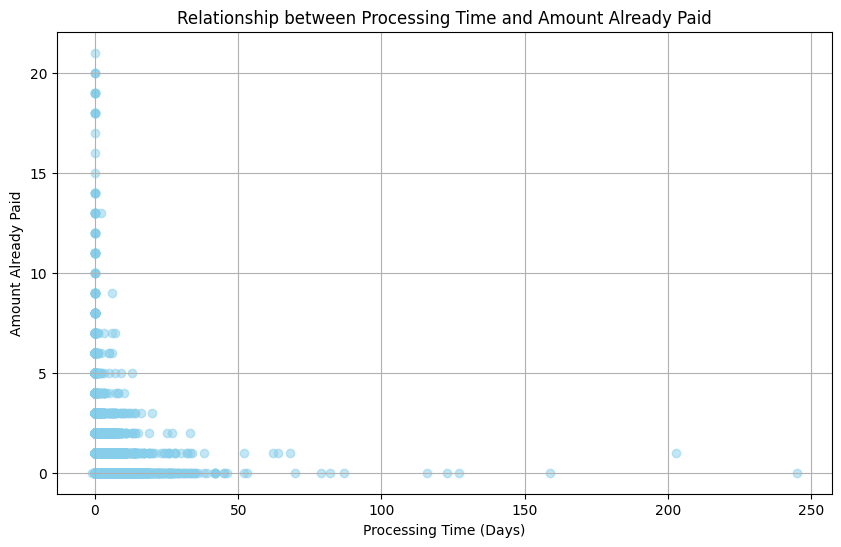

In [98]:
loan_df['applicationDate'] = pd.to_datetime(loan_df['applicationDate'])
loan_df['originatedDate'] = pd.to_datetime(loan_df['originatedDate'])

loan_df['processingDays'] = (loan_df['originatedDate'] - loan_df['applicationDate']).dt.days


plt.figure(figsize=(10, 6))
plt.scatter(loan_df['processingDays'], loan_df['nPaidOff'], color='skyblue', alpha=0.5)
plt.title('Relationship between Processing Time and Amount Already Paid')
plt.xlabel('Processing Time (Days)')
plt.ylabel('Amount Already Paid')
plt.grid(True)
plt.show()



Data points are concentrated heavily in the bottom part of the processing time spectrum. This implies that a sizable number of payments are handled quickly following the start of the loan or payment plan. Based on this plot, it does not seem like there is a direct relationship between processing time and payment amount. Regardless of the amount paid, the majority of the payments appear to be concentrated inside a particular range of processing timeframes.

Sub-question 4.2: Influence of loan status on future lending decisions

Data Exploration: Track the progression of `loanStatus` over multiple loans for repeat borrowers.

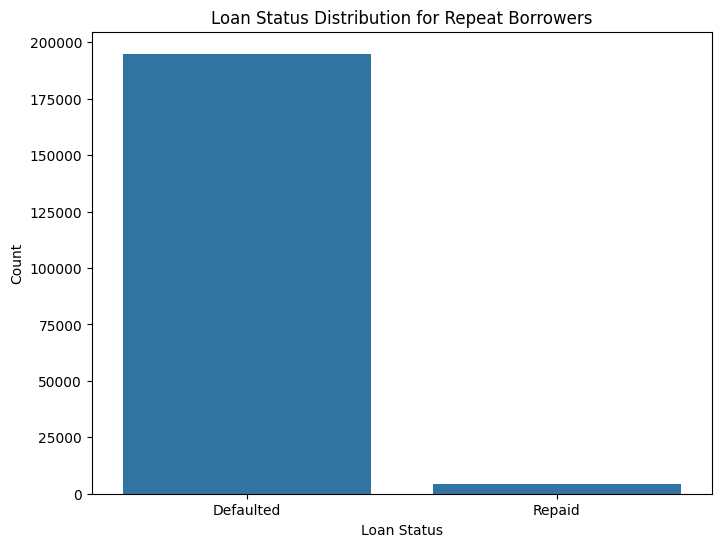

In [99]:
repeat_borrowers_df = loan_df.groupby('anon_ssn').filter(lambda x: len(x) > 1)

plt.figure(figsize=(8, 6))
sns.countplot(data=repeat_borrowers_df, x='loanRepaidStatus')
plt.title('Loan Status Distribution for Repeat Borrowers')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

The bar for defaulted loans is much higher than the bar for repaid loans, suggesting that there are more defaulted loans than repaid loans in this dataset of repeat borrowers.

Analysis 2: Predictive modeling of next loan `loanStatus`.

In [100]:
loan_df['nPaidOff'] = loan_df.groupby('anon_ssn')['loanId'].transform('count') - 1
loan_df['lastLoanStatus'] = loan_df.sort_values(by=['anon_ssn', 'applicationDate']).groupby('anon_ssn')['loanStatus'].shift(1)
loan_df.dropna(inplace=True) 

X = loan_df[['loanAmount', 'apr', 'nPaidOff']] 
y = loan_df['loanStatus']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))  

Accuracy: 0.4864612511671335
                      precision    recall  f1-score   support

Charged Off Paid Off       0.00      0.00      0.00         4
 External Collection       0.44      0.59      0.51       306
 Internal Collection       0.23      0.14      0.18       104
            New Loan       0.31      0.24      0.27       150
       Paid Off Loan       0.61      0.64      0.63       450
    Pending Paid Off       0.00      0.00      0.00         7
       Returned Item       0.14      0.05      0.07        21
  Settled Bankruptcy       0.00      0.00      0.00        10
 Settlement Paid Off       0.00      0.00      0.00        19

            accuracy                           0.49      1071
           macro avg       0.19      0.18      0.18      1071
        weighted avg       0.45      0.49      0.46      1071



Given that the accuracy is less than 50% overall and that certain classes have very low performance metrics, the model is unable to perform well on this dataset. As a result, additional data and reevaluation of the model may be needed.

Analysis 3: Investigate transitions in `loanStatus` over multiple loans per borrower. visualize the flow of loan status changes for repeat borrowers.

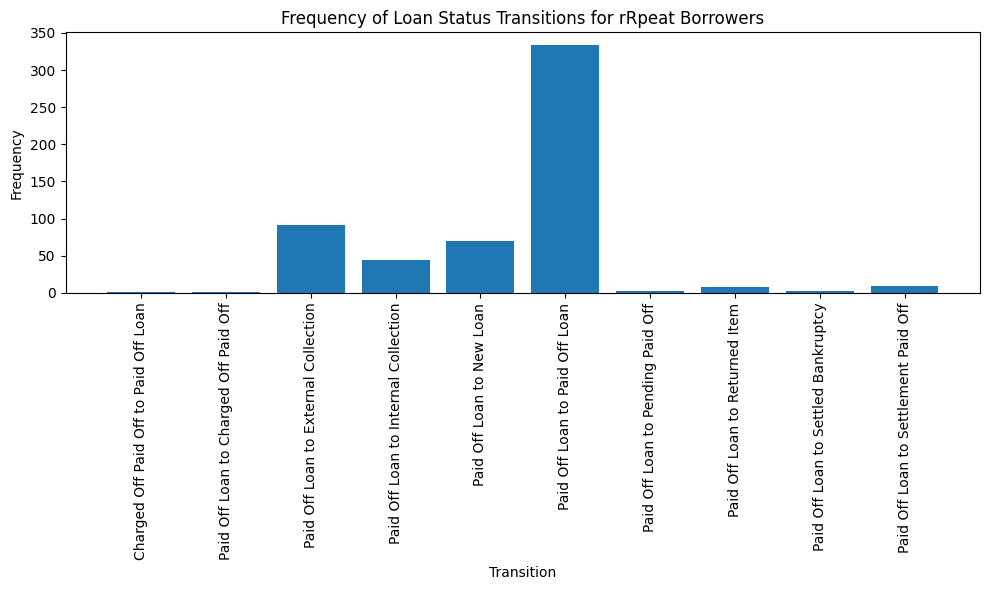

In [101]:
repeat_borrowers_df = loan_df.groupby('anon_ssn').filter(lambda x: len(x) > 1)

sorted_repeat_borrowers = repeat_borrowers_df.sort_values(['anon_ssn', 'applicationDate'])

sorted_repeat_borrowers['next_loanStatus'] = sorted_repeat_borrowers.groupby('anon_ssn')['loanStatus'].shift(-1)
transitions = sorted_repeat_borrowers.groupby(['loanStatus', 'next_loanStatus']).size().reset_index(name='frequency')
borrowers_with_multiple_loans = sorted_repeat_borrowers.groupby('anon_ssn').filter(lambda x: len(x) > 2)

plt.figure(figsize=(10, 6))
plt.bar(x=range(len(transitions)), height=transitions['frequency'])
plt.xlabel('Transition')
plt.ylabel('Frequency')
plt.title('Frequency of Loan Status Transitions for rRpeat Borrowers')
plt.xticks(ticks=range(len(transitions)), labels=[f"{row['loanStatus']} to {row['next_loanStatus']}" for idx, row in transitions.iterrows()], rotation=90)
plt.tight_layout()
plt.show()

The chart's most noteworthy finding is that the "Paid Off to Paid Off" transition has the highest frequency. This suggests that a sizable portion of loans are being repaid, and that the borrowers are subsequently taking out and repaying another loan. Upon seeing this trend, a financial institution may think about producing customised financial solutions, implementing loyalty programmes, or providing higher interest rates to these devoted customers.

Sub-question 4.3: The effect of first payment status on overall loan repayment

Analysis 1: Evaluate the correlation between the `fpStatus` of the first payment and the overall loan repayment.

In [102]:
loan_df['originatedDate'] = pd.to_datetime(loan_df['originatedDate'])
payment_df['paymentDate'] = pd.to_datetime(payment_df['paymentDate'])

payment_df_sorted = payment_df.sort_values(by='paymentDate')
first_payments = payment_df_sorted.groupby('loanId').first().reset_index()

temp_loan_df = loan_df.merge(first_payments[['loanId', 'paymentStatus']], on='loanId', how='left', suffixes=('_loan', '_first_payment'))

repaid_statuses = ['Paid Off Loan', 'Settlement Paid Off']
temp_loan_df['loanRepaid'] = temp_loan_df['loanStatus'].apply(lambda x: 1 if x in repaid_statuses else 0)

temp_loan_df['fpStatus'] = temp_loan_df['fpStatus'].astype('category')

correlation = temp_loan_df['fpStatus'].cat.codes.corr(temp_loan_df['loanRepaid'])

print("Correlation between first payment status and loan repayment:", correlation)


Correlation between first payment status and loan repayment: -0.23001368919867324


The status of the initial payment and loan repayment appear to have a weakly negative association, as indicated by the correlation coefficient of -0.23. There is a minor tendency for the loan to be repaid to decrease in proportion to the status of the initial payment. However, the strength of this link is regarded as weak because the value is relatively close to zero. The negative association still implies that one of the most important aspect in the loan is the initial payment. If there are issues with the first payment, it can become a pattern for the remainder of the loan term. On the other hand, if the first payment is made successfully, it may demonstrate the borrower's dedication and sound financial standing, increasing the likelihood that the loan will be returned.

Conclusion of Main Question 4:

In terms of how well loans are repaid, borrower history, particularly loan status is important predictors of successful loan payback, even when processing times do not directly correlate with repayment amounts. It is a sign of a dependable borrower segment when borrowers pay off their debts before taking out new ones. But the greater rate of defaults among returning customers points to the necessity of a more careful analysis of borrower characteristics and loan conditions.

In [103]:
loan_df.to_csv('data/newloan.csv', index=False)

In [104]:
payment_df.to_csv('data/newpayment.csv', index=False)

Appendix.t

The additional information or data I might look to collect ia the loan installment period.

I have uploaded the new CSV data for reference purposes. In my code, I work with the original CSV, modifying and adding columns to the dataframe. In the final stage, I convert this dataframe into a CSV file for reference purposes only.

This week has been particularly challenging, with six assignments and a presentation on my agenda. As a result, I have spent approximately 50 hours only to complete this assessment. Despite the tight schedule, I have tried my best to produce quality work. Although the result may not be perfect, I assure that I am dedicated to continuous improvement. I am keen to use what I have learned from this experience to better serve MoneyLion company and strive for excellence in future projects.